In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx
import seaborn as sns
import numpy as np

In [2]:
DATA_PATH = Path() / "../data"
#DATA_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/data')
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_csv(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_csv(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

def load_excel(filename, data_path=DATA_PATH):
    csv_path = data_path / filename
    return pd.read_excel(csv_path)

PLOT_PATH = Path() / "../plot"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

RESULT_PATH = Path() / "../result"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
RESULT_PATH.mkdir(parents=True,exist_ok=True)
def save_result(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False, encoding='utf-8-sig')

def save_excel(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_excel(csv_path, index=False)


In [3]:
data = load_excel('final_dataset.xlsx')

### Reformat

In [4]:
data.columns

Index(['profileUrl', 'screenName_fo', 'userId_fo', 'name_fo', 'imgUrl_fo',
       'bio_fo', 'website_fo', 'location', 'location_cleansed', 'createdAt_fo',
       'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo',
       'certified_fo', 'following_fo', 'followedBy_fo', 'timestamp_fo',
       'row_id', 'if personal account', 'Position', 'Organization',
       'ai_related', 'Frequency', 'Include?', 'position_categorized',
       'highest_level_org', 'screenName_kol', 'userId_kol', 'name_kol',
       'imgUrl_kol', 'bio_kol', 'website_kol', 'location_kol', 'createdAt_kol',
       'followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol',
       'certified_kol'],
      dtype='object')

In [5]:
KOL_list = data['name_kol'].drop_duplicates().reset_index(drop = True).to_list()
KOL_list

['Elon Musk',
 'Yann LeCun',
 'Andrej Karpathy',
 'Andrew Ng',
 'Mustafa Suleyman',
 'Ian Goodfellow',
 'Fei-Fei Li',
 'Demis Hassabis',
 'Sam Altman',
 'Kai-Fu Lee',
 'Russ Salakhutdinov',
 'Geoffrey Hinton',
 'Greg Brockman',
 'Daphne Koller',
 'Ilya Sutskever',
 nan]

In [6]:
data[data['name_kol'].isna()]

profileUrl screenName_fo  userId_fo name_fo imgUrl_fo bio_fo website_fo  \
3641        NaN           NaN        NaN     NaN       NaN    NaN        NaN   

     location location_cleansed createdAt_fo  ...  name_kol  imgUrl_kol  \
3641      NaN        Pittsburgh          NaN  ...       NaN         NaN   

      bio_kol  website_kol  location_kol  createdAt_kol followersCount_kol  \
3641      NaN          NaN           NaN            NaN                NaN   

      friendsCount_kol tweetsCount_kol certified_kol  
3641               NaN             NaN           NaN  

[1 rows x 38 columns]

In [7]:
data_cleaned = data.dropna(subset=['name_kol'])
len(data_cleaned)

3641

In [8]:
reformat_data = data_cleaned[['screenName_kol', 'userId_kol', 'name_kol',
       'imgUrl_kol', 'bio_kol', 'website_kol', 'location_kol', 'createdAt_kol',
       'followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol',
       'screenName_fo', 'userId_fo', 'name_fo', 'imgUrl_fo',
       'bio_fo', 'website_fo', 'location', 'location_cleansed', 'createdAt_fo',
       'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo',
       'certified_fo', 'timestamp_fo', 'if personal account', 'Position', 'Organization',
       'ai_related', 'position_categorized', 'highest_level_org',
       'following_fo'
       # 'Frequency', 'Include?', 'row_id', 
       ]]

In [9]:
reformat_data.head()

screenName_kol  userId_kol         name_kol  \
0       elonmusk  44196397.0        Elon Musk   
1       elonmusk  44196397.0        Elon Musk   
2       elonmusk  44196397.0        Elon Musk   
3         ylecun  48008938.0       Yann LeCun   
4       karpathy  33836629.0  Andrej Karpathy   

                                          imgUrl_kol  \
0  https://pbs.twimg.com/profile_images/168332538...   
1  https://pbs.twimg.com/profile_images/168332538...   
2  https://pbs.twimg.com/profile_images/168332538...   
3  https://pbs.twimg.com/profile_images/148357786...   
4  https://pbs.twimg.com/profile_images/129666729...   

                                             bio_kol     website_kol  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2                                                NaN             NaN   
3  Professor at NYU. Chief AI Scientist at Meta.\...  yann.lecun.com   
4  🧑‍🍳. Previously Director of AI @ Tesla, foundi...     karpathy.ai   

  location_kol                   createdAt_kol  followersCount_kol  \
0          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
1          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
2          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
3     New York  Wed Jun 17 16:05:51 +0000 2009            701891.0   
4     Stanford  Tue Apr 21 06:49:15 +0000 2009            962447.0   

   friendsCount_kol  ...  tweetsCount_fo certified_fo  \
0             574.0  ...          3929.0          1.0   
1             574.0  ...         27269.0          0.0   
2             574.0  ...         10595.0          1.0   
3             713.0  ...         10639.0          0.0   
4             898.0  ...         10639.0          0.0   

               timestamp_fo if personal account    Position     Organization  \
0  2024-04-08T01:47:01.053Z                   N         NaN              NaN   
1  2024-04-08T01:47:00.079Z                   N         NaN              NaN   
2  2024-04-08T01:46:59.012Z                   N         NaN              NaN   
3  2024-04-08T01:52:48.750Z                   Y  researcher  Google DeepMind   
4  2024-04-08T02:08:28.525Z                   Y  researcher  Google DeepMind   

  ai_related    position_categorized highest_level_org following_fo  
0          N                     NaN               NaN          NaN  
1          N                     NaN               NaN          NaN  
2          N                     NaN               NaN          NaN  
3          Y  Researcher & Scientist            Google          NaN  
4          Y  Researcher & Scientist            Google          NaN  

[5 rows x 32 columns]

In [10]:
reformat_data['following_fo'] = reformat_data['following_fo'].fillna(0)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_13959/965732538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reformat_data['following_fo'] = reformat_data['following_fo'].fillna(0)


In [11]:
reformat_data['following_fo'].value_counts()

following_fo
0.0    3488
1.0     153
Name: count, dtype: int64

In [12]:
# reformat_data.head()

In [13]:
kol_pos = load_excel('../data/kol_position.xlsx')
# kol_pos

data_cleaned2 = pd.merge(data_cleaned, kol_pos[['userId_kol', 'position_categorized_kol', 'highest_level_org_kol']], 
                         left_on='userId_kol', right_on='userId_kol', how='left')
data_cleaned2

profileUrl    screenName_fo     userId_fo  \
0     https://twitter.com/wonderofscience  wonderofscience  3.101589e+09   
1      https://twitter.com/WallStreetSilv   WallStreetSilv  1.366566e+18   
2       https://twitter.com/AMAZlNGNATURE    AMAZlNGNATURE  2.828213e+09   
3            https://twitter.com/giffmana         giffmana  2.236048e+09   
4            https://twitter.com/giffmana         giffmana  2.236048e+09   
...                                   ...              ...           ...   
3636           https://twitter.com/OpenAI           OpenAI  4.398626e+09   
3637       https://twitter.com/midjourney       midjourney  1.307056e+18   
3638       https://twitter.com/OpenAIDevs       OpenAIDevs  1.633875e+18   
3639        https://twitter.com/hsu_steve        hsu_steve  1.610781e+08   
3640       https://twitter.com/TlkngMchns       TlkngMchns  2.873929e+09   

                 name_fo                                          imgUrl_fo  \
0      Wonder of Science  https://pbs.twimg.com/profile_images/104644161...   
1     Wall Street Silver  https://pbs.twimg.com/profile_images/148217996...   
2     Nature is Amazing   https://pbs.twimg.com/profile_images/992795937...   
3     Lucas Beyer (bl16)  https://pbs.twimg.com/profile_images/378800000...   
4     Lucas Beyer (bl16)  https://pbs.twimg.com/profile_images/378800000...   
...                  ...                                                ...   
3636              OpenAI  https://pbs.twimg.com/profile_images/163405803...   
3637          Midjourney  https://pbs.twimg.com/profile_images/150007894...   
3638   OpenAI Developers  https://pbs.twimg.com/profile_images/172059874...   
3639           steve hsu  https://pbs.twimg.com/profile_images/237384547...   
3640    Talking Machines  https://pbs.twimg.com/profile_images/961629518...   

                                                 bio_fo  \
0     "The most beautiful thing we can experience is...   
1     Finance, economics, news, memes and silver. Co...   
2                           Animals  Nature  Discovery    
3     Researcher (Google DeepMind/Brain in Zrich, ex...   
4     Researcher (Google DeepMind/Brain in Zrich, ex...   
...                                                 ...   
3636  OpenAIs mission is to ensure that artificial g...   
3637  New research lab. Exploring new mediums of tho...   
3638  Official @OpenAI account for anyone building o...   
3639           physicist, startup founder, blogger, dad   
3640  Human conversations about machine learning. Ho...   

                     website_fo         location location_cleansed  \
0     linktr.ee/wonderofscience             üöÄ               NaN   
1            linktr.ee/wssilver             üëâ               NaN   
2                           NaN             üåç               NaN   
3                lucasb.eyer.be  Z√ºrich, Suisse            Suisse   
4                lucasb.eyer.be  Z√ºrich, Suisse            Suisse   
...                         ...              ...               ...   
3636                 openai.com              NaN               NaN   
3637             midjourney.com              NaN               NaN   
3638        platform.openai.com              NaN               NaN   
3639      infoproc.blogspot.com              NaN               NaN   
3640     thetalkingmachines.com              NaN               NaN   

                        createdAt_fo  ...  \
0     Sat Mar 21 12:29:37 +0000 2015  ...   
1     Tue Mar 02 01:47:11 +0000 2021  ...   
2     Tue Sep 23 15:27:26 +0000 2014  ...   
3     Sun Dec 08 13:31:09 +0000 2013  ...   
4     Sun Dec 08 13:31:09 +0000 2013  ...   
...                              ...  ...   
3636  Sun Dec 06 22:51:08 +0000 2015  ...   
3637  Fri Sep 18 20:38:07 +0000 2020  ...   
3638  Thu Mar 09 16:58:51 +0000 2023  ...   
3639  Tue Jun 29 23:02:37 +0000 2010  ...   
3640  Wed Nov 12 16:55:58 +0000 2014  ...   

                                                bio_kol     website_kol  \
0  

### EDA

#### followings point to influencer

In [ ]:
# Create a directed graph
G1 = nx.DiGraph()

# Adding nodes and edges from the dataset
# We use name_fo for follower nodes and screenName_kol for influencer nodes
for _, row in data_cleaned[['name_fo', 'screenName_kol']].dropna().iterrows():
    G1.add_node(row['name_fo'], type='follower')
    G1.add_node(row['screenName_kol'], type='influencer')
    G1.add_edge(row['name_fo'], row['screenName_kol'])

# Visualizing the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G1, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G1, pos, node_size=20, node_color=[G1.nodes[n]['type'] == 'influencer' for n in G1])
nx.draw_networkx_edges(G1, pos, alpha=0.1)
plt.title('Network Graph of Followers and Influencers')
plt.axis('off')  # Turn off the axis
save_fig('network_graph1')
plt.show()

In [ ]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G1)
in_degree_centrality = nx.in_degree_centrality(G1)
out_degree_centrality = nx.out_degree_centrality(G1)
betweenness_centrality = nx.betweenness_centrality(G1)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G1)
clossness_centrality = nx.closeness_centrality(G1)

# Prepare the data for display
centrality_measures1 = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': clossness_centrality
})

In [ ]:
# Display the top 20 nodes by in-degree centrality
top20_nodes_by_in_degree = centrality_measures1.sort_values(by='In-Degree Centrality', ascending=False).head(20)
top20_nodes_by_in_degree

In [ ]:
top50_nodes_by_in_degree = centrality_measures1.sort_values(by='In-Degree Centrality', ascending=False).head(50)
top50_nodes_by_in_degree

In-degree centrality measures the number of followers a user has. This is because each follower represents an incoming link (or edge) to the user (node).
A higher in-degree centrality indicates that a user is more popular or influential, as more people choose to follow them. This can signify a user's reach and ability to disseminate information widely through their tweets.
If analysis focuses on identifying influential users, gauging the popularity of users, or understanding how information might spread from influential nodes, in-degree centrality is the appropriate measure.

Degree centrality in an undirected network measures the total number of connections a node has, ignoring the direction of the connection.
For Twitter, if considering the network as undirected (combining followers and following into a single measure), degree centrality would indicate how active a user is in terms of their overall social engagement on Twitter.
If the focus is more on general activity or engagement levels (both following and being followed) without distinguishing the type of engagement, you might consider using degree centrality. However, typically, Twitter networks are better analyzed as directed networks due to the clear distinction between followers and following.

Out-degree indicates how active a node is in terms of its interactions or communications with other nodes. For instance, on Twitter, a user's out-degree centrality would measure how many other users they follow. High out-degree centrality might suggest that a node has the potential to spread information or resources widely across the network, assuming that its connections are receptive. Understanding nodes with high out-degree centrality can be crucial for analyzing the dynamics of influence, information dissemination, and even control within a network.

In [ ]:
centrality_measures1['In-Degree Centrality'].describe()

In [ ]:
# Set up the graph visualization
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G1, seed=42)  # positions for all nodes

# Nodes
node_sizes = [in_degree_centrality[n] * 7000 for n in G1]  # Scale in-degree centrality for visibility
node_colors = [eigenvector_centrality[n] for n in G1]  # Color by eigenvector centrality

# Draw the nodes
nodes = nx.draw_networkx_nodes(G1, pos, node_size=node_sizes, node_color=node_colors, 
                               cmap=plt.cm.plasma, alpha=0.8, ax=ax)

# Draw the edges
nx.draw_networkx_edges(G1, pos, alpha=0.2, ax=ax)

# Draw labels for top 20 by in-degree centrality
top_labels = {n: n for n in top50_nodes_by_in_degree.index}
nx.draw_networkx_labels(G1, pos, labels=top_labels, font_size=10, font_color='black', ax=ax)

# Colorbar for eigenvector centrality
plt.colorbar(nodes, label='Eigenvector Centrality', shrink=0.8)

ax.set_title('Network of Twitter Influencers (Size by In-Degree, Color by Eigenvector Centrality)')
plt.axis('off')  # Hide axes
save_fig('influencers_network')
plt.show()

In [ ]:
top_labels

In [ ]:
top50_data = data[data['name_fo'].isin(top_labels.keys())][[
    'screenName_fo', 'name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'ai_related', 'if personal account',
    'position_categorized', 'highest_level_org'
]].drop_duplicates('name_fo').set_index('screenName_fo')
top50_data

In [ ]:
import seaborn as sns

# Analyze the geographical distribution using the 'location_cleansed' column
position_cat = top50_data['position_categorized'].value_counts()  # Top 50 positions

# Plotting the geographic distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat.values, y=position_cat.index, palette='coolwarm')
plt.title('Position Distribution of Top 50 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution')
plt.show()

#### influencer point to followings - Random Layout

Saving figure network_graph2


KeyboardInterrupt: 

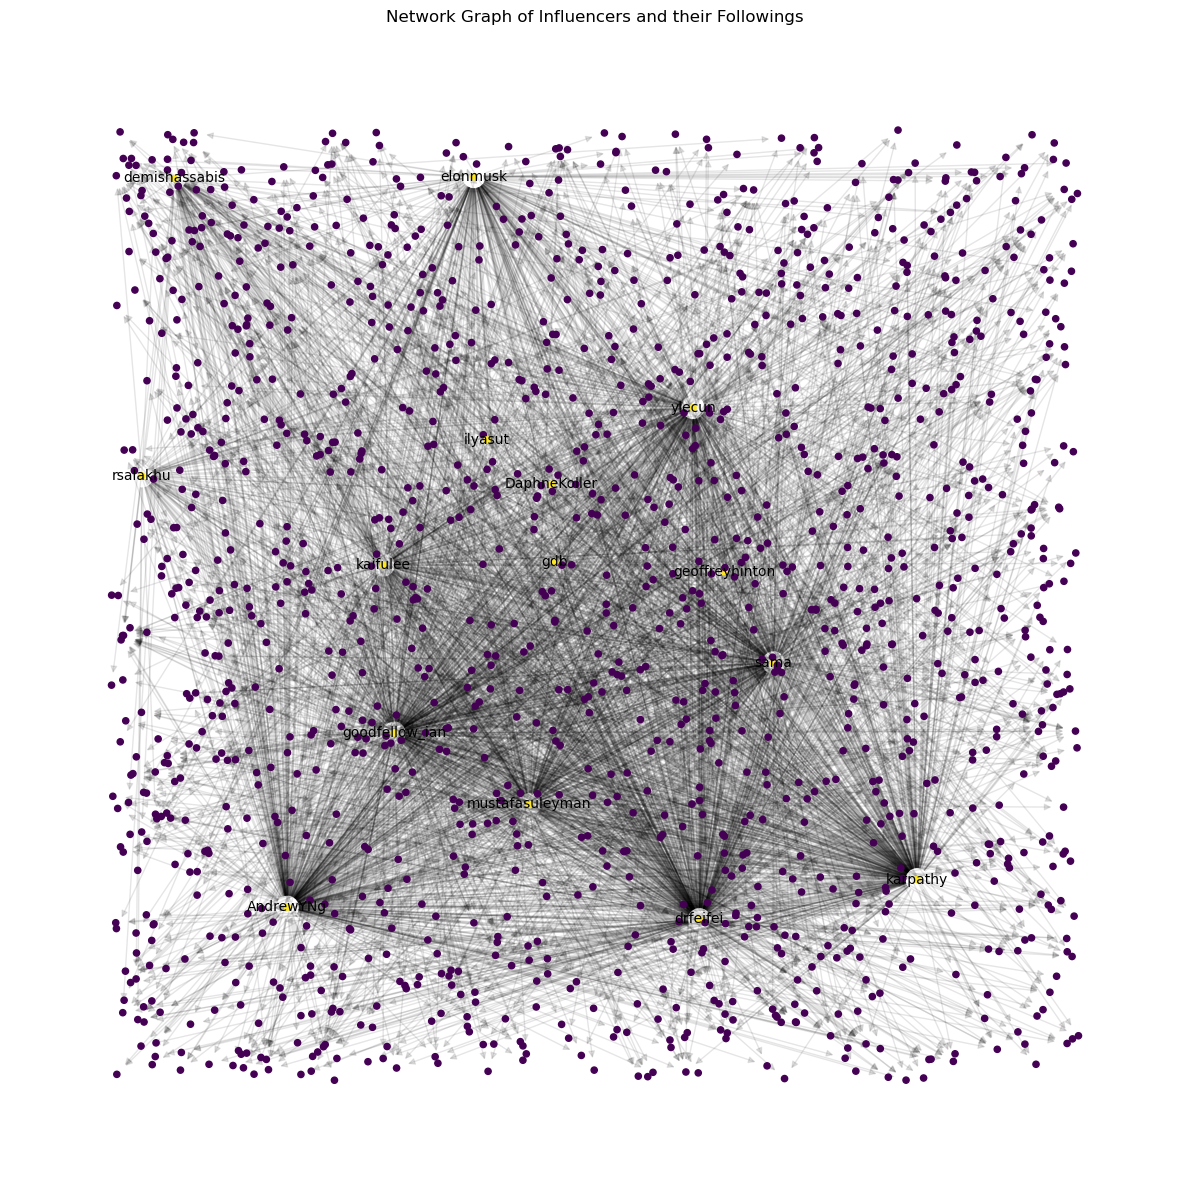

In [13]:
# Create a directed graph
G2 = nx.DiGraph()

# Add edges to the graph
for index, row in reformat_data.iterrows():
    G2.add_node(row['screenName_kol'], type='influencer')
    G2.add_node(row['name_fo'], type='following')
    G2.add_edge(row['screenName_kol'], row['name_fo'], follow_back=row['following_fo'])

# Define edge styles: solid for follow-back, dashed for not
edge_styles = {1: 'solid', 0: 'dashed'}
for u, v, d in G2.edges(data=True):
    G2[u][v]['style'] = edge_styles[d['follow_back']]

# Visualizing the network
plt.figure(figsize=(12, 12))
pos_random = nx.random_layout(G2, seed=42)  # Positions for all nodes

nx.draw_networkx_nodes(G2, pos_random, node_size=20, node_color=[G2.nodes[n]['type'] == 'influencer' for n in G2])
nx.draw_networkx_edges(G2, pos_random, alpha=0.1)
kol_labels = {node: node for node, data in G2.nodes(data=True) if data['type'] == 'influencer'}
nx.draw_networkx_labels(G2, pos_random, labels=kol_labels, font_size=10, font_color='black')

plt.title('Network Graph of Influencers and their Followings')
plt.axis('off')  # Turn off the axis
save_fig('network_graph2')
plt.show()

Nodes are placed randomly in the drawing area. This can be useful for large networks to get a quick sense of the randomness or density.

In [ ]:
# The 10 nodes away from central

# Calculate the centroid of the graph
centroid1 = np.mean(list(pos_random.values()), axis=0)

# Calculate the Euclidean distance of each node from the centroid
distances1 = {node: np.linalg.norm(np.array(position) - centroid1) for node, position in pos_random.items()}

# Sort nodes by distance from centroid in descending order
sorted_nodes1 = sorted(distances1, key=distances1.get, reverse=True)

# Select top 10 furthest nodes
furthest_nodes1 = sorted_nodes1[:10]

print("The 10 nodes furthest from the central cluster are:", furthest_nodes1)

In [ ]:
top10_furthest1 = data[data['name_fo'].isin(furthest_nodes1)].drop_duplicates('name_fo')
top10_furthest1

In [ ]:
top10_furthest1.describe()

In [ ]:
top10_furthest1[['name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'bio_fo', 'ai_related', 'if personal account', 'position_categorized', 'highest_level_org']]

Top 10 furthest in random layout: 10 non-KOLs, 3 AI-related, 4 organization account, 3 positions related to Tech, the other position is public figures. 

#### influencer point to followings - Spectral Layout

In [ ]:
# Create a directed graph
G2_2 = nx.DiGraph()

# Add edges to the graph
for index, row in reformat_data.iterrows():
    G2_2.add_node(row['screenName_kol'], type='influencer')
    G2_2.add_node(row['name_fo'], type='following')
    G2_2.add_edge(row['screenName_kol'], row['name_fo'], follow_back=row['following_fo'])

# Define edge styles: solid for follow-back, dashed for not
edge_styles = {1: 'solid', 0: 'dashed'}
for u, v, d in G2_2.edges(data=True):
    G2_2[u][v]['style'] = edge_styles[d['follow_back']]

# Visualizing the network
plt.figure(figsize=(12, 12))
pos_spectral = nx.spectral_layout(G2_2)  # Positions for all nodes

nx.draw_networkx_nodes(G2_2, pos_spectral, node_size=20, node_color=[G2_2.nodes[n]['type'] == 'influencer' for n in G2_2])
nx.draw_networkx_edges(G2_2, pos_spectral, alpha=0.1)
kol_labels = {node: node for node, data in G2_2.nodes(data=True) if data['type'] == 'influencer'}
nx.draw_networkx_labels(G2_2, pos_spectral, labels=kol_labels, font_size=10, font_color='black')

plt.title('Network Graph of Influencers and their Followings')
plt.axis('off')  # Turn off the axis
save_fig('network_graph3')
plt.show()



Uses the eigenvalues and eigenvectors of the graph Laplacian. The spectral layout is particularly good at illustrating clusters or communities within networks.

In [ ]:
# The 10 nodes away from central

# Calculate the centroid of the graph
centroid2 = np.mean(list(pos_spectral.values()), axis=0)

# Calculate the Euclidean distance of each node from the centroid
distances2 = {node: np.linalg.norm(np.array(position) - centroid2) for node, position in pos_spectral.items()}

# Sort nodes by distance from centroid in descending order
sorted_nodes2 = sorted(distances2, key=distances2.get, reverse=True)

# Select top 10 furthest nodes
furthest_nodes2 = sorted_nodes2[:10]

print("The 10 nodes furthest from the central cluster are:", furthest_nodes2)

In [ ]:
top10_furthest2 = data[data['name_fo'].isin(furthest_nodes2)].drop_duplicates('name_fo')
top10_furthest2

In [ ]:
top10_furthest2.describe()

In [ ]:
top10_furthest2[['name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'bio_fo', 'ai_related', 'if personal account', 'position_categorized', 'highest_level_org']]

Top 10 furthest in spectral layout: 10 non-KOLs, None AI related, 4 corporate accounts, positions includes investors, public figures and company members, not related to tech.

### Centrality Metrics

Saving figure network_graph2


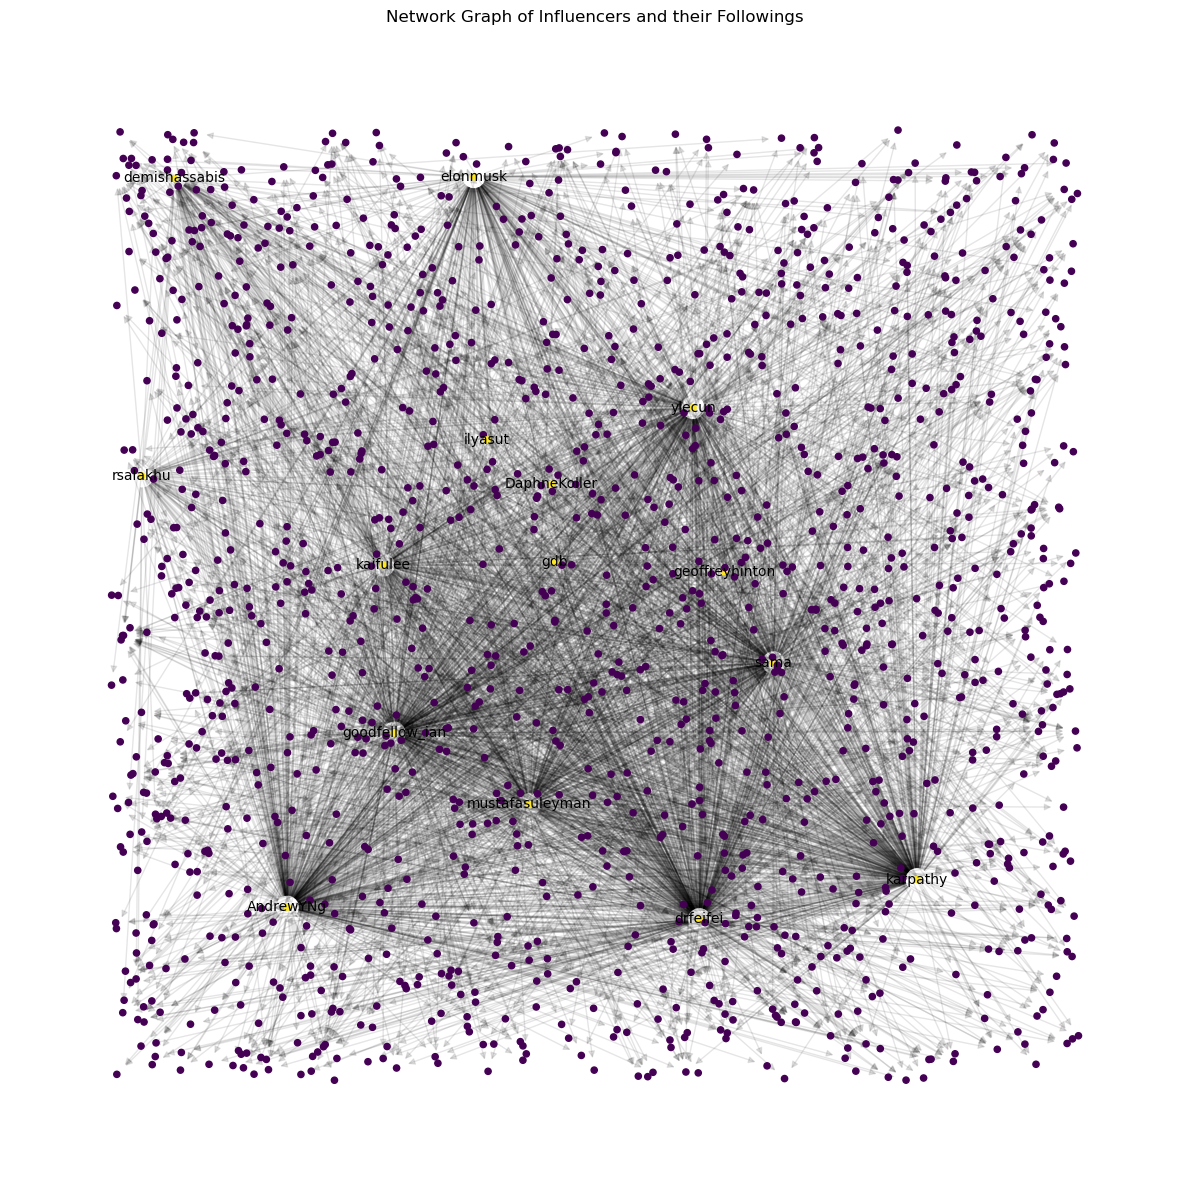

In [14]:
# Create a directed graph
G2 = nx.DiGraph()

# Add edges to the graph
for index, row in reformat_data.iterrows():
    G2.add_node(row['screenName_kol'], type='influencer')
    G2.add_node(row['name_fo'], type='following')
    G2.add_edge(row['screenName_kol'], row['name_fo'], follow_back=row['following_fo'])

# Define edge styles: solid for follow-back, dashed for not
edge_styles = {1: 'solid', 0: 'dashed'}
for u, v, d in G2.edges(data=True):
    G2[u][v]['style'] = edge_styles[d['follow_back']]

# Visualizing the network
plt.figure(figsize=(12, 12))
pos_random = nx.random_layout(G2, seed=42)  # Positions for all nodes

nx.draw_networkx_nodes(G2, pos_random, node_size=20, node_color=[G2.nodes[n]['type'] == 'influencer' for n in G2])
nx.draw_networkx_edges(G2, pos_random, alpha=0.1)
kol_labels = {node: node for node, data in G2.nodes(data=True) if data['type'] == 'influencer'}
nx.draw_networkx_labels(G2, pos_random, labels=kol_labels, font_size=10, font_color='black')

plt.title('Network Graph of Influencers and their Followings')
plt.axis('off')  # Turn off the axis
save_fig('network_graph2')
plt.show()

In [15]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G2)
in_degree_centrality = nx.in_degree_centrality(G2)
out_degree_centrality = nx.out_degree_centrality(G2)
betweenness_centrality = nx.betweenness_centrality(G2)
eigenvector_centrality = nx.eigenvector_centrality(G2)
clossness_centrality = nx.closeness_centrality(G2)

# Prepare the data for display
centrality_measures = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': clossness_centrality
})


In [16]:
# Display the top 50 nodes by in-degree centrality
top50_nodes_by_in_degree = centrality_measures.sort_values(by='In-Degree Centrality', ascending=False).head(50)
top50_nodes_by_in_degree

Degree Centrality  In-Degree Centrality  \
Ilya Sutskever                0.008910              0.008910   
OpenAI                        0.008225              0.008225   
Jeff Dean (@)                 0.008225              0.008225   
Paul Graham                   0.007539              0.007539   
Oriol Vinyals                 0.006854              0.006854   
Andrej Karpathy               0.006854              0.006854   
Yann LeCun                    0.006854              0.006854   
Geoffrey Hinton               0.006854              0.006854   
Bill Gates                    0.006854              0.006854   
Demis Hassabis                0.006854              0.006854   
Sam Altman                    0.006854              0.006854   
Vinod Khosla                  0.006854              0.006854   
Shivon Zilis                  0.006854              0.006854   
Jack Clark                    0.006169              0.006169   
John Carmack                  0.006169              0.006169   
Andrew Ng                     0.006169              0.006169   
Elon Musk                     0.006169              0.006169   
Sundar Pichai                 0.006169              0.006169   
Reid Hoffman                  0.005483              0.005483   
Richard Socher                0.005483              0.005483   
Fei-Fei Li                    0.005483              0.005483   
Nando de Freitas              0.005483              0.005483   
Eric Topol                    0.005483              0.005483   
Christian Szegedy             0.005483              0.005483   
Hugo Larochelle               0.005483              0.005483   
Satya Nadella                 0.005483              0.005483   
Eric Schmidt                  0.005483              0.005483   
Marc Andreessen               0.005483              0.005483   
Google AI                     0.005483              0.005483   
Barack Obama                  0.005483              0.005483   
Pieter Abbeel                 0.005483              0.005483   
Greg Brockman                 0.005483              0.005483   
Tim Cook                      0.005483              0.005483   
Patrick Collison              0.004798              0.004798   
Mustafa Suleyman              0.004798              0.004798   
Quoc Le                       0.004798              0.004798   
Russ Salakhutdinov            0.004798              0.004798   
jack                          0.004798              0.004798   
Fernando Pereira              0.004798              0.004798   
Eric Horvitz                  0.004798              0.004798   
Ian Goodfellow                0.004798              0.004798   
Erik Brynjolfsson             0.004798              0.004798   
Kyunghyun Cho                 0.004798              0.004798   
Jim Fan                       0.004798              0.004798   
Lex Fridman                   0.004798              0.004798   
Chris Anderson                0.004798              0.004798   
Franois Chollet               0.004798              0.004798   
Alec Radford                  0.004798              0.004798   
Oren Etzioni                  0.004798              0.004798   
Christopher Manning           0.004798              0.004798   

                     Out-Degree Centrality  Betweenness Centrality  \
Ilya Sutskever                         0.0                     0.0   
OpenAI                                 0.0                     0.0   
Jeff Dean (@)                          0.0                     0.0   
Paul Graham                            0.0                     0.0   
Oriol Vinyals                          0.0                     0.0   
Andrej Karpathy                        0.0                     0.0   
Yann LeCun                             0.0                     0.0   
Geoffrey Hinton                        0.0                     0.0   
Bill Gates                             0.0                     0.0   
Demis Hassabis                         0.0              

Saving figure influencers_network


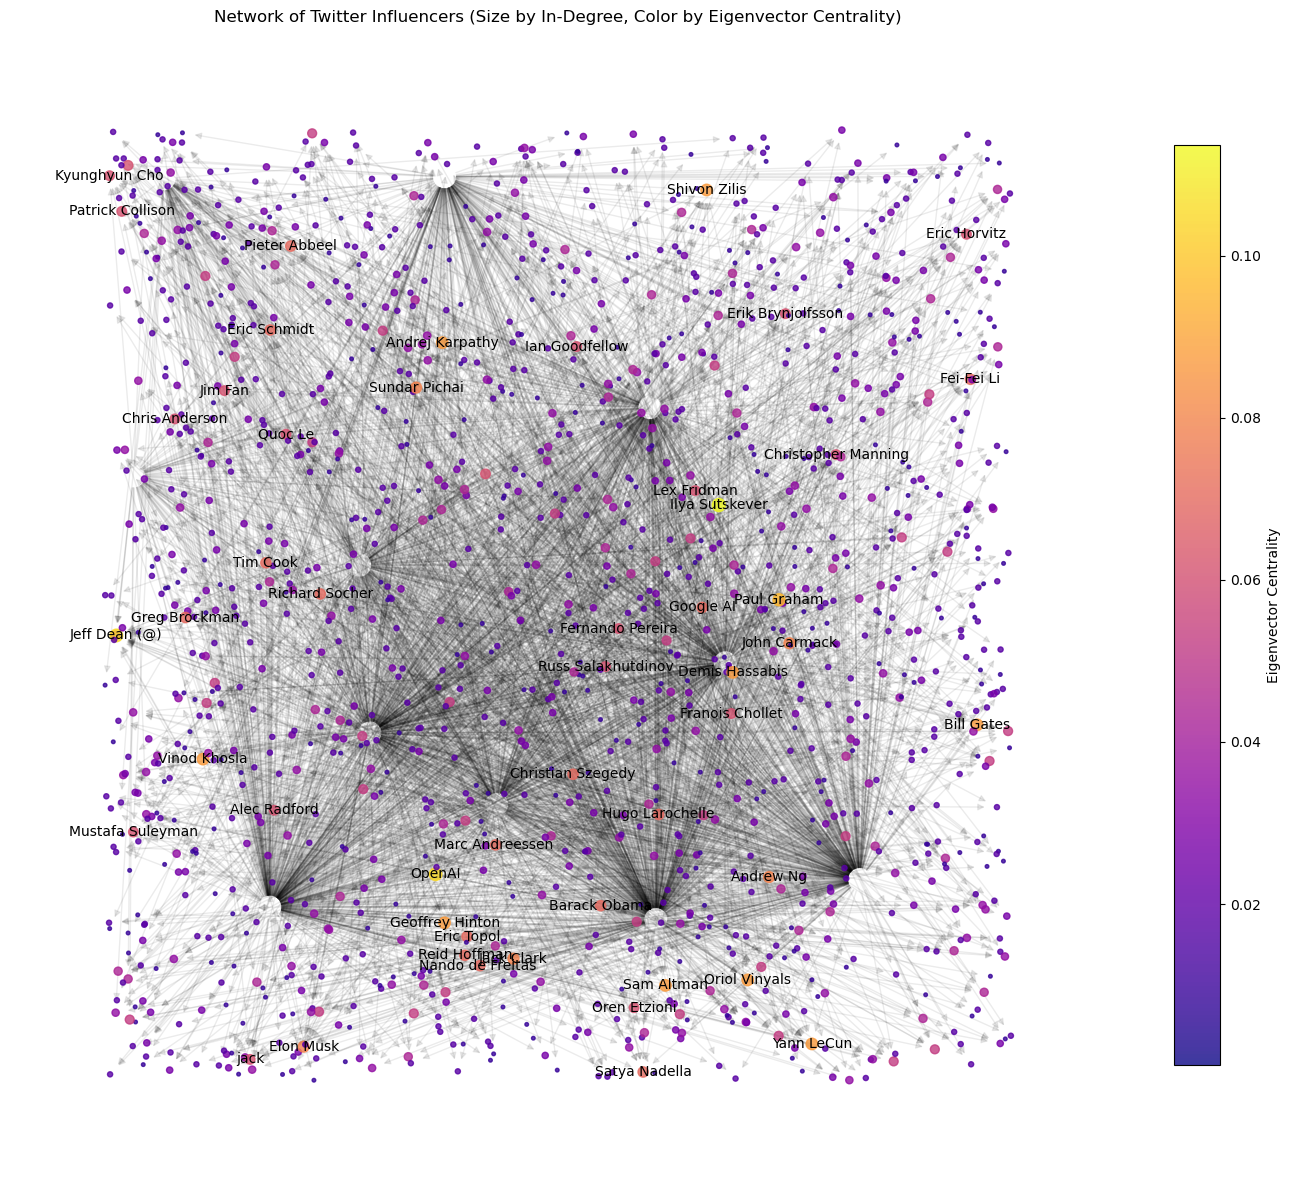

In [17]:
# Set up the graph visualization
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.random_layout(G2, seed=42)  # positions for all nodes

# Nodes
node_sizes = [in_degree_centrality[n] * 10000 for n in G2]  # Scale in-degree centrality for visibility
node_colors = [eigenvector_centrality[n] for n in G2]  # Color by eigenvector centrality

# Draw the nodes
nodes = nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color=node_colors, 
                               cmap=plt.cm.plasma, alpha=0.8, ax=ax)

# Draw the edges
nx.draw_networkx_edges(G2, pos, alpha=0.08, ax=ax)

# Draw labels for top 50 by in-degree centrality
top_labels = {n: n for n in top50_nodes_by_in_degree.index}
nx.draw_networkx_labels(G2, pos, labels=top_labels, font_size=10, font_color='black', ax=ax)

# Colorbar for eigenvector centrality
plt.colorbar(nodes, label='Eigenvector Centrality', shrink=0.8)

ax.set_title('Network of Twitter Influencers (Size by In-Degree, Color by Eigenvector Centrality)')
plt.axis('off')  # Hide axes
save_fig('influencers_network')
plt.show()


10/15 influencer in top 50.

Eigenvector centrality is a measure of the influence of a node within a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. 

Influential Connections: The node is likely connected to other nodes that are themselves influential or have high eigenvector centralities. In simpler terms, this node is followed by KOLs who are also followed by many other KOLs.
Indirect Influence: Even if the node doesn't have a very high degree centrality (i.e., it's not followed by a large number of KOLs), its high eigenvector centrality suggests that its followers are significant influencers within the network. This can mean that the node has indirect influence through its powerful connections.

Potential for Information Spread: A node with high eigenvector centrality is well-positioned to spread information effectively through the network, as its tweets or messages are likely to be seen and shared by other influential users.

Strategic Importance: From a marketing or information campaign perspective, such a node might be very valuable despite not being a KOL itself. Engaging with this user could lead to higher visibility among KOLs and their followings due to the user's influential network position.

Community Hub: The node might serve as a hub within a community of KOLs. This could indicate that the user is a thought leader in a niche area or subject that is of particular interest to KOLs.

In summary, a high eigenvector centrality in this dataset would indicate that the node is not just popular in terms of the number of KOLs following it, but also in terms of the quality of those connections in the network. Such nodes might be central in the flow of information and could have a substantial impact on the network despite possibly not being KOLs themselves.

In [18]:
top_labels

{'Ilya Sutskever': 'Ilya Sutskever',
 'OpenAI': 'OpenAI',
 'Jeff Dean (@)': 'Jeff Dean (@)',
 'Paul Graham': 'Paul Graham',
 'Oriol Vinyals': 'Oriol Vinyals',
 'Andrej Karpathy': 'Andrej Karpathy',
 'Yann LeCun': 'Yann LeCun',
 'Geoffrey Hinton': 'Geoffrey Hinton',
 'Bill Gates': 'Bill Gates',
 'Demis Hassabis': 'Demis Hassabis',
 'Sam Altman': 'Sam Altman',
 'Vinod Khosla': 'Vinod Khosla',
 'Shivon Zilis': 'Shivon Zilis',
 'Jack Clark': 'Jack Clark',
 'John Carmack': 'John Carmack',
 'Andrew Ng': 'Andrew Ng',
 'Elon Musk': 'Elon Musk',
 'Sundar Pichai': 'Sundar Pichai',
 'Reid Hoffman': 'Reid Hoffman',
 'Richard Socher': 'Richard Socher',
 'Fei-Fei Li': 'Fei-Fei Li',
 'Nando de Freitas ': 'Nando de Freitas ',
 'Eric Topol': 'Eric Topol',
 'Christian Szegedy': 'Christian Szegedy',
 'Hugo Larochelle': 'Hugo Larochelle',
 'Satya Nadella': 'Satya Nadella',
 'Eric Schmidt': 'Eric Schmidt',
 'Marc Andreessen ': 'Marc Andreessen ',
 'Google AI': 'Google AI',
 'Barack Obama': 'Barack Obama',


In [19]:
top_labels_nonKOL = {name: value for name, value in top_labels.items() if name not in KOL_list}

In [20]:
top_labels_nonKOL
# count = 37

{'OpenAI': 'OpenAI',
 'Jeff Dean (@)': 'Jeff Dean (@)',
 'Paul Graham': 'Paul Graham',
 'Oriol Vinyals': 'Oriol Vinyals',
 'Bill Gates': 'Bill Gates',
 'Vinod Khosla': 'Vinod Khosla',
 'Shivon Zilis': 'Shivon Zilis',
 'Jack Clark': 'Jack Clark',
 'John Carmack': 'John Carmack',
 'Sundar Pichai': 'Sundar Pichai',
 'Reid Hoffman': 'Reid Hoffman',
 'Richard Socher': 'Richard Socher',
 'Nando de Freitas ': 'Nando de Freitas ',
 'Eric Topol': 'Eric Topol',
 'Christian Szegedy': 'Christian Szegedy',
 'Hugo Larochelle': 'Hugo Larochelle',
 'Satya Nadella': 'Satya Nadella',
 'Eric Schmidt': 'Eric Schmidt',
 'Marc Andreessen ': 'Marc Andreessen ',
 'Google AI': 'Google AI',
 'Barack Obama': 'Barack Obama',
 'Pieter Abbeel': 'Pieter Abbeel',
 'Tim Cook': 'Tim Cook',
 'Patrick Collison': 'Patrick Collison',
 'Quoc Le': 'Quoc Le',
 'jack': 'jack',
 'Fernando Pereira': 'Fernando Pereira',
 'Eric Horvitz': 'Eric Horvitz',
 'Erik Brynjolfsson': 'Erik Brynjolfsson',
 'Kyunghyun Cho': 'Kyunghyun Cho',


In [21]:
top_data_nonKOL = data_cleaned[data_cleaned['name_fo'].isin(top_labels_nonKOL.keys())][[
    'screenName_fo', 'name_fo', 'location', 'location_cleansed', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'ai_related', 'if personal account',
    'position_categorized', 'highest_level_org',
]].drop_duplicates('name_fo').set_index('screenName_fo')
top_data_nonKOL = top_data_nonKOL[top_data_nonKOL['if personal account'] == 'Y']
top_data_nonKOL # count = 35

name_fo            location location_cleansed  \
screenName_fo                                                                
BarackObama             Barack Obama      Washington, DC        Washington   
fchollet             Franois Chollet       United States               USA   
ChrSzegedy         Christian Szegedy       Sunnyvale, CA         Sunnyvale   
erikbryn           Erik Brynjolfsson            Stanford          Stanford   
BillGates                 Bill Gates         Seattle, WA           Seattle   
erichorvitz             Eric Horvitz     Seattle WA  USA           Seattle   
etzioni                 Oren Etzioni             Seattle           Seattle   
jackclarkSF               Jack Clark   San Francisco, CA     San Francisco   
AlecRad                 Alec Radford   San Francisco, CA     San Francisco   
patrickc            Patrick Collison  patrick@stripe.com               NaN   
earnmyturns         Fernando Pereira  Palo Alto, CA, USA         Palo Alto   
shivon                  Shivon Zilis       Palo Alto, CA         Palo Alto   
chrmanning       Christopher Manning           Palo Alto         Palo Alto   
chr1sa                Chris Anderson              Orinda            Orinda   
reidhoffman             Reid Hoffman   new world of work          New York   
ericschmidt             Eric Schmidt   Mountain View, CA     Mountain View   
quocleix                     Quoc Le   Mountain View, CA     Mountain View   
pmarca              Marc Andreessen       Menlo Park, CA        Menlo Park   
kchonyc                Kyunghyun Cho       Manhattan, NY         Manhattan   
NandoDF            Nando de Freitas      London, England            London   
OriolVinyalsML         Oriol Vinyals     London, England            London   
EricTopol                 Eric Topol        La Jolla, CA          La Jolla   
ID_AA_Carmack           John Carmack          Dallas, TX            Dallas   
tim_cook                    Tim Cook           Cupertino         Cupertino   
DrJimFan                     Jim Fan         Contact ‚Üí               NaN   
pabbeel                Pieter Abbeel        Berkeley, CA          Berkeley   
lexfridman               Lex Fridman   Austin and Boston           Austin    
JeffDean               Jeff Dean (@)                 NaN               NaN   
RichardSocher         Richard Socher                 NaN               NaN   
paulg                    Paul Graham                 NaN               NaN   
hugo_larochelle      Hugo Larochelle                 NaN               NaN   
vkhosla                 Vinod Khosla                 NaN               NaN   
satyanadella           Satya Nadella                 NaN               NaN   
sundarpichai           Sundar Pichai                 NaN               NaN   
jack                            jack                 NaN               NaN   

                 followersCount_fo  friendsCount_fo  tweetsCount_fo  \
screenName_fo                                                         
BarackObama            131913049.0         543248.0         17013.0   
fchollet                  466714.0            766.0         22368.0   
ChrSzegedy                 31878.0           2109.0          6985.0   
erikbryn                  208650.0           4408.0         26608.0   
BillGates               64520390.0            586.0          4458.0   
erichorvitz                28496.0           1585.0          2520.0   
etzioni                    27543.0           1636.0          8150.0   
jackclarkSF                67173.0           4674.0         31551.0   
AlecRad                    42713.0            317.0           560.0   
patrickc                  455022.0             31.0          9324.0   
earnmyturns                18561.0            230.0          3124.0   
shivon                    122959.0           1701.0          3336.0   
chrmanning                125534.0            114.0          2313.0   
chr1sa                    182344.0           2275.0         25826.0   
reidho

Saving figure position_distribution


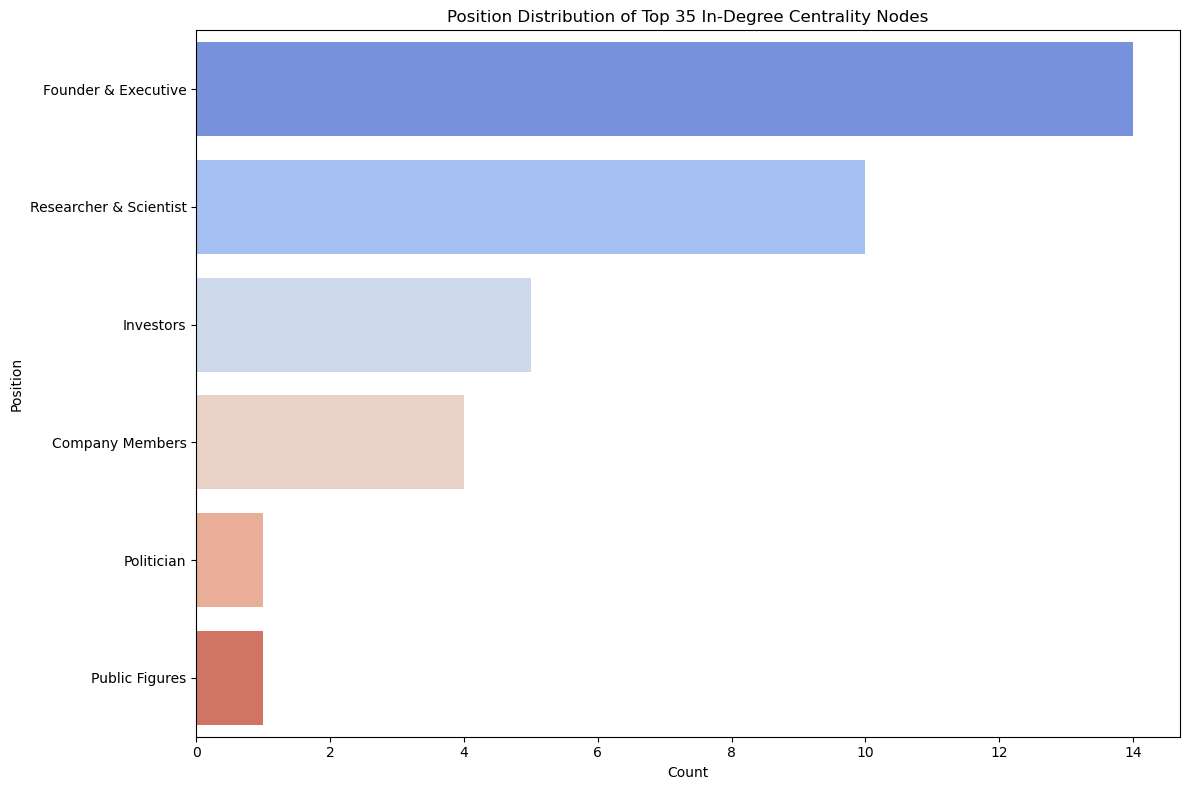

In [22]:
position_cat = top_data_nonKOL['position_categorized'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat.values, y=position_cat.index, palette='coolwarm')
plt.title('Position Distribution of Top 35 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution')
plt.show()

Saving figure location_distribution


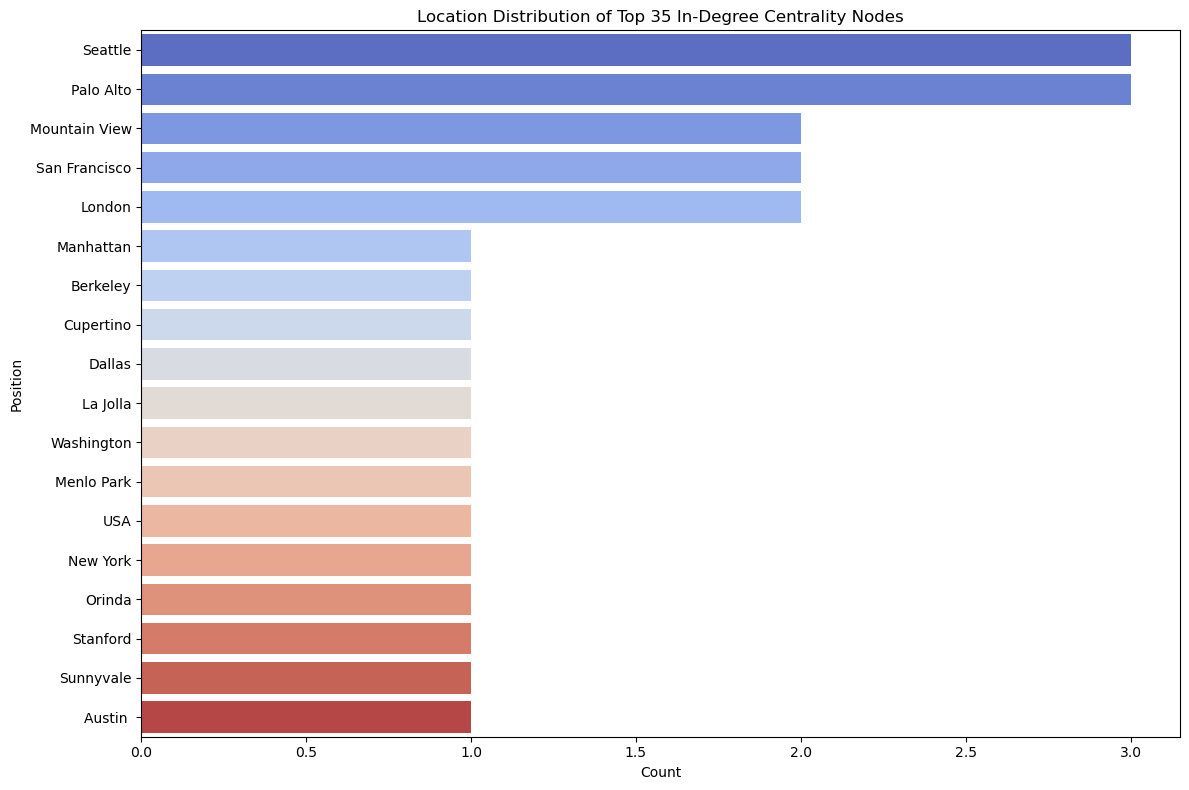

In [23]:
location_cat = top_data_nonKOL['location_cleansed'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat.values, y=location_cat.index, palette='coolwarm')
plt.title('Location Distribution of Top 35 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('location_distribution')
plt.show()

### Social Influence - overall

In [24]:
G5 = nx.DiGraph()

for _, row in data_cleaned.iterrows():
    # G5.add_node(row['screenName_kol'], type='influencer')
    G5.add_node(row['name_fo'], type='following')
    G5.add_edge(row['name_kol'], row['name_fo'])
    
    G5.nodes[row['name_fo']]['followersCount'] = row['followersCount_fo']
    G5.nodes[row['name_fo']]['tweetsCount'] = row['tweetsCount_fo']
    G5.nodes[row['name_fo']]['friendsCount'] = row['friendsCount_fo']
    # G5.nodes[row['name_fo']]['certified'] = row['certified_kol']  # Verification status could also indicate influence

In [25]:
# Normalize metrics
max_followers = max(nx.get_node_attributes(G5, 'followersCount').values(), default=0)  # Adding default to handle empty cases
max_degree = max(nx.degree_centrality(G5).values(), default=0)  # Adding default to handle empty cases

for node in G5.nodes():
    followers_count = G5.nodes[node].get('followersCount', 0)  # Provide a default if missing
    followers_norm = followers_count / max_followers if max_followers > 0 else 0
    degree_norm = nx.degree_centrality(G5).get(node, 0) / max_degree if max_degree > 0 else 0
    G5.nodes[node]['influence_score'] = 0.5 * followers_norm + 0.5 * degree_norm

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


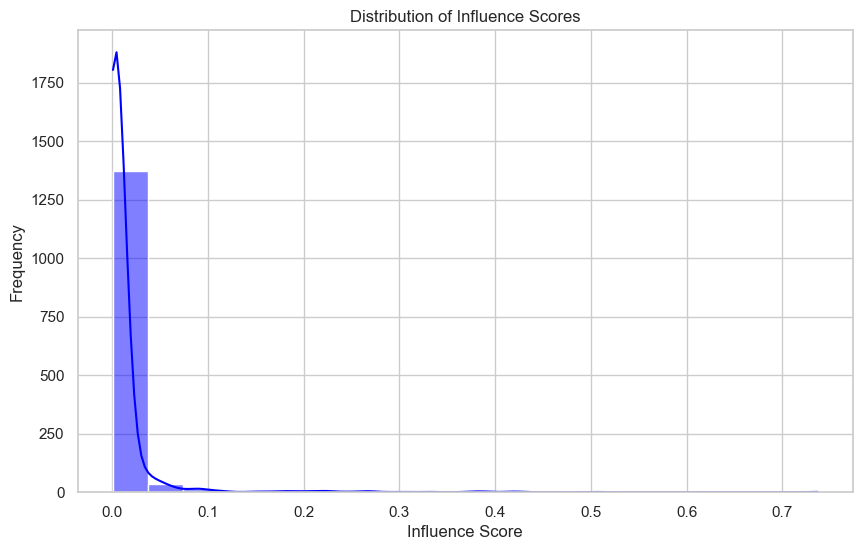

In [26]:
influence_scores = [G5.nodes[node]['influence_score'] for node in G5.nodes()]

sns.set(style="whitegrid")

# Plotting the distribution of influence scores with seaborn
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.histplot(influence_scores, bins=20, kde=True, color='blue')  # KDE adds a density curve
plt.title('Distribution of Influence Scores')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Finding top influencers within KOL's followings
top_influencers = sorted(G5.nodes(data=True), key=lambda x: x[1].get('influence_score', 0), reverse=True)[:200]

top_influencers_in_followings = pd.DataFrame({
    'Node': [node for node, data in top_influencers],
    'Influence Score': [data['influence_score'] for node, data in top_influencers],
    'Followers Count': [data.get('followersCount', 'N/A') for node, data in top_influencers]
})

# Exclude KOL
top_influencers_in_followings = top_influencers_in_followings[~top_influencers_in_followings['Node'].isin(KOL_list)].reset_index(drop = True)
top_influencers_in_followings

Node  Influence Score  Followers Count
0       Barack Obama         0.373198      131913149.0
1            Rihanna         0.300350      107949316.0
2      Narendra Modi         0.270136       97057010.0
3       Taylor Swift         0.267075       95296828.0
4    Donald J. Trump         0.245971       87360322.0
..               ...              ...              ...
180  Richard Dawkins         0.011093        3013917.0
181  The Babylon Bee         0.011002        3637781.0
182       John Kerry         0.010943        3288199.0
183  The Independent         0.010909        3604478.0
184     Vinod Khosla         0.010854         629483.0

[185 rows x 3 columns]

In [28]:
top_influencers_full = data_cleaned[data_cleaned['name_fo'].isin(top_influencers_in_followings['Node'])].drop_duplicates('name_fo').reset_index(drop = True)
top_influencers_full

profileUrl    screenName_fo     userId_fo  \
0      https://twitter.com/redbullracing    redbullracing  2.260878e+08   
1       https://twitter.com/newscientist     newscientist  1.965883e+07   
2           https://twitter.com/JohnCena         JohnCena  1.416646e+08   
3    https://twitter.com/ScienceMagazine  ScienceMagazine  3.237283e+07   
4        https://twitter.com/BarackObama      BarackObama  8.132860e+05   
..                                   ...              ...           ...   
180       https://twitter.com/HarvardBiz       HarvardBiz  1.480027e+07   
181           https://twitter.com/FLOTUS           FLOTUS  1.349155e+18   
182      https://twitter.com/ZelenskyyUa      ZelenskyyUa  1.120634e+18   
183   https://twitter.com/AnnaKendrick47   AnnaKendrick47  5.994940e+07   
184               https://twitter.com/VP               VP  8.036942e+17   

                          name_fo  \
0          Oracle Red Bull Racing   
1                   New Scientist   
2                       John Cena   
3                Science Magazine   
4                    Barack Obama   
..                            ...   
180       Harvard Business Review   
181                    Jill Biden   
182       Volodymyr Zelenskyy /     
183                 Anna Kendrick   
184  Vice President Kamala Harris   

                                             imgUrl_fo  \
0    https://pbs.twimg.com/profile_images/177574120...   
1    https://pbs.twimg.com/profile_images/960860144...   
2    https://pbs.twimg.com/profile_images/158973093...   
3    https://pbs.twimg.com/profile_images/100191823...   
4    https://pbs.twimg.com/profile_images/132964752...   
..                                                 ...   
180  https://pbs.twimg.com/profile_images/124977896...   
181  https://pbs.twimg.com/profile_images/134986869...   
182  https://pbs.twimg.com/profile_images/158555004...   
183  https://pbs.twimg.com/profile_images/481264998...   
184  https://pbs.twimg.com/profile_images/138065778...   

                                                bio_fo  \
0                   Currently in Japan  #GivesYouWings   
1    The best place to find out whats new in scienc...   
2    A forum of thoughts and perspectives designed ...   
3    The world's leading outlet for cutting-edge re...   
4                    Dad, husband, President, citizen.   
..                                                 ...   
180  The best ideas in business and management to h...   
181  First Lady of the United States Jill Biden. Co...   
182                           President of Ukraine /     
183                                      kind of a lot   
184  Vice President of the United States. Wife to t...   

                        website_fo                        location  \
0          onein.bio/redbullracing                       Worldwide   
1                 newscientist.com                       Worldwide   
2             makeawish.org/donate                West Newbury, MA   
3                      science.org  Washington, DC & Cambridge, UK   
4             barackobamabooks.com                  Washington, DC   
..                             ...                             ...   
180                        hbr.org                             NaN   
181  whitehouse.gov/cancermoonshot                             NaN   
182               president.gov.ua                             NaN   
183                            NaN                             NaN   
184                 whitehouse.gov                             NaN   

    location_cleansed                    createdAt_fo  ...        name_kol  \
0                 NaN  Mon Dec 13 08:12:04 +0000 2010  ...       Elon Musk   
1                 NaN  Wed Jan 28 16:05:49 +0000 2009  ...       Elon Musk   
2        West Newbury  Sat May 08 17:43:50 +0000 2010  ...      Sam Altman   
3          Washington  Fri Apr 17 11:37:12 +0000 2009  ...  Ian Goodfellow   
4          Washington  Mon Mar 05 22:08:25 +0000 2007  ... 

In [29]:
top_influencers_person = top_influencers_full[top_influencers_full['if personal account'] == 'Y']
top_influencers_person

profileUrl   screenName_fo     userId_fo  \
2          https://twitter.com/JohnCena        JohnCena  1.416646e+08   
4       https://twitter.com/BarackObama     BarackObama  8.132860e+05   
5      https://twitter.com/KamalaHarris    KamalaHarris  3.035499e+07   
6          https://twitter.com/JoeBiden        JoeBiden  9.390910e+05   
12    https://twitter.com/MichelleObama   MichelleObama  4.094866e+08   
..                                  ...             ...           ...   
175     https://twitter.com/StephenKing     StephenKing  2.233154e+09   
181          https://twitter.com/FLOTUS          FLOTUS  1.349155e+18   
182     https://twitter.com/ZelenskyyUa     ZelenskyyUa  1.120634e+18   
183  https://twitter.com/AnnaKendrick47  AnnaKendrick47  5.994940e+07   
184              https://twitter.com/VP              VP  8.036942e+17   

                          name_fo  \
2                       John Cena   
4                    Barack Obama   
5                   Kamala Harris   
6                       Joe Biden   
12                 Michelle Obama   
..                            ...   
175                  Stephen King   
181                    Jill Biden   
182       Volodymyr Zelenskyy /     
183                 Anna Kendrick   
184  Vice President Kamala Harris   

                                             imgUrl_fo  \
2    https://pbs.twimg.com/profile_images/158973093...   
4    https://pbs.twimg.com/profile_images/132964752...   
5    https://pbs.twimg.com/profile_images/159224131...   
6    https://pbs.twimg.com/profile_images/130876966...   
12   https://pbs.twimg.com/profile_images/176283627...   
..                                                 ...   
175  https://pbs.twimg.com/profile_images/378800000...   
181  https://pbs.twimg.com/profile_images/134986869...   
182  https://pbs.twimg.com/profile_images/158555004...   
183  https://pbs.twimg.com/profile_images/481264998...   
184  https://pbs.twimg.com/profile_images/138065778...   

                                                bio_fo  \
2    A forum of thoughts and perspectives designed ...   
4                    Dad, husband, President, citizen.   
5    Fighting for the people. Wife, Momala, Auntie....   
6    Husband to @DrBiden, proud father and grandfat...   
12   Girl from the South Side and former First Lady...   
..                                                 ...   
175                                             Author   
181  First Lady of the United States Jill Biden. Co...   
182                           President of Ukraine /     
183                                      kind of a lot   
184  Vice President of the United States. Wife to t...   

                        website_fo          location location_cleansed  \
2             makeawish.org/donate  West Newbury, MA      West Newbury   
4             barackobamabooks.com    Washington, DC        Washington   
5                     joebiden.com    Washington, DC        Washington   
6                     joebiden.com    Washington, DC        Washington   
12          michelleobamabooks.com    Washington, DC        Washington   
..                             ...               ...               ...   
175                stephenking.com               NaN               NaN   
181  whitehouse.gov/cancermoonshot               NaN               NaN   
182               president.gov.ua               NaN               NaN   
183                            NaN               NaN               NaN   
184                 whitehouse.gov               NaN               NaN   

                       createdAt_fo  ...    name_kol  \
2    Sat May 08 17:43:50 +0000 2010  ...  Sam Altman   
4    Mon Mar 05 22:08:25 +0000 2007  ...  Yann LeCun   
5    Sat Apr 11 00:42:07 +0000 2009  ...  Kai-Fu Lee   
6    Sun Mar 11 17:51:24 +0000 2007  ...  Kai-Fu Lee   
12   Thu Nov 10 20:13:01 +0000 2011  ...   Andrew Ng   
..                              ...  ...         ...   
175  Fri Dec 06 15:26:35 +0000 2

Saving figure position_distribution2


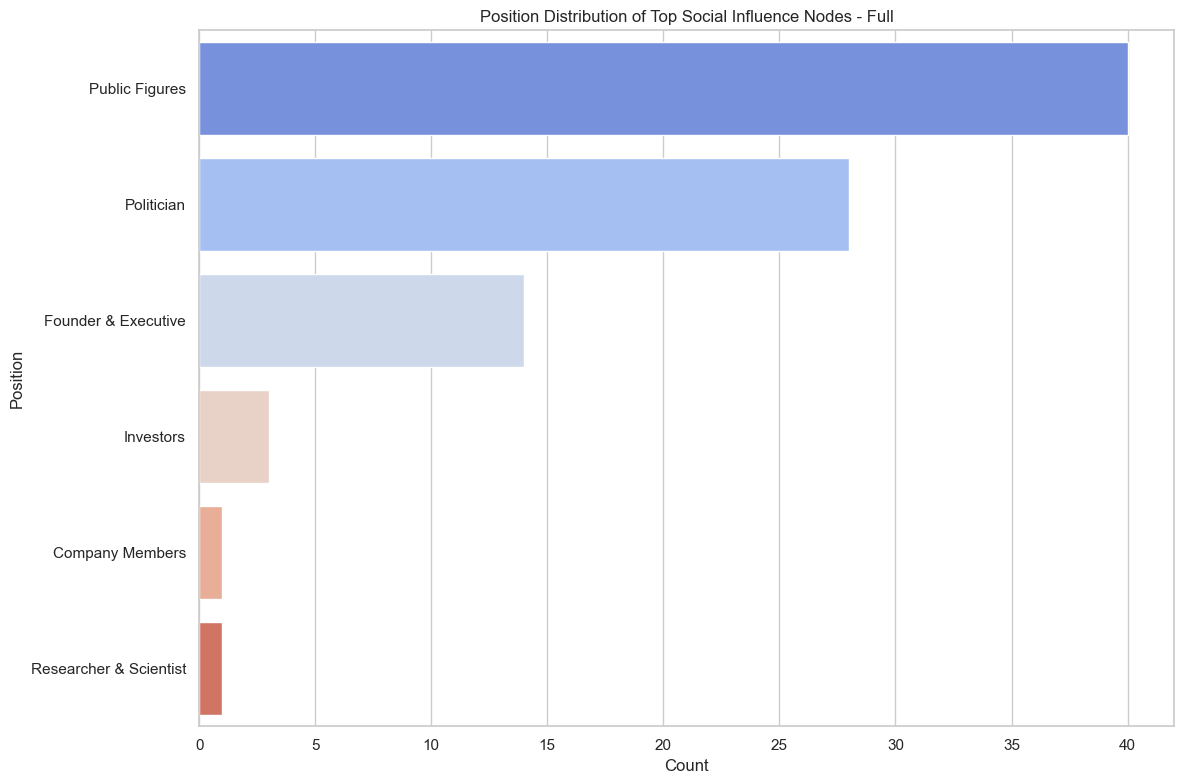

In [30]:
position_cat2 = top_influencers_person['position_categorized'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat2.values, y=position_cat2.index, palette='coolwarm')
plt.title('Position Distribution of Top Social Influence Nodes - Full')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution2')
plt.show()

Saving figure location_distribution2


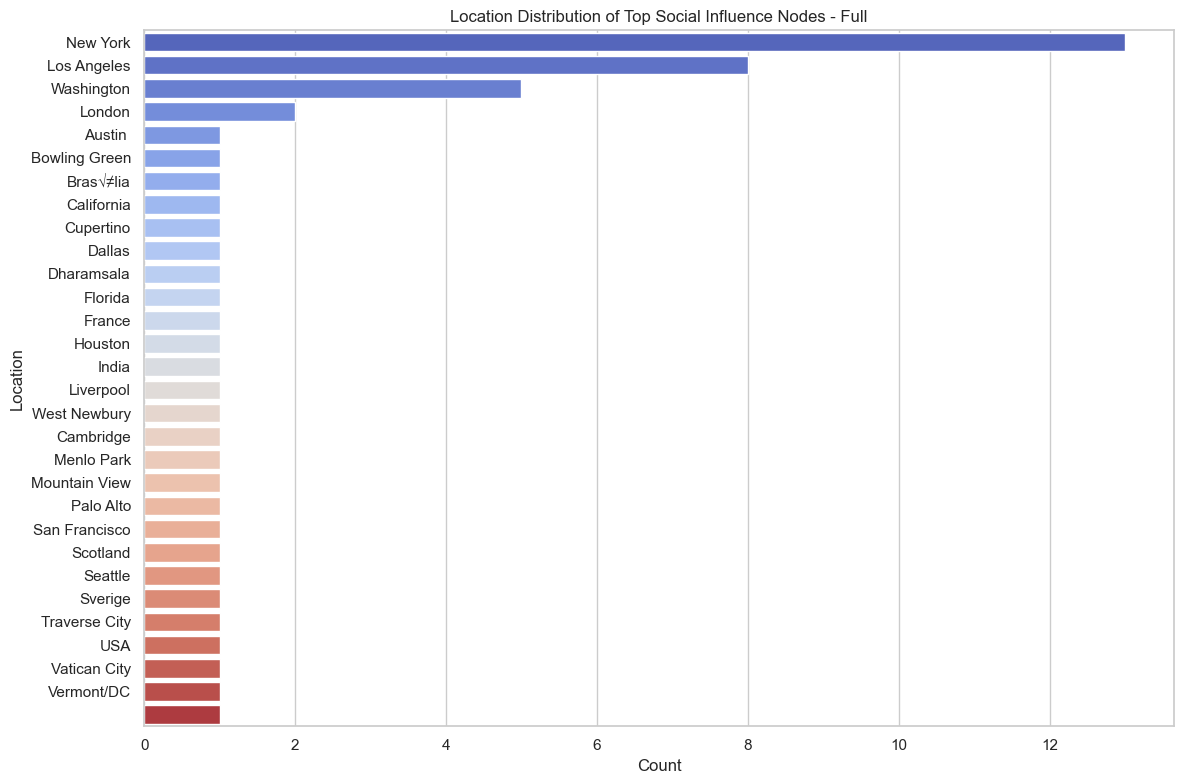

In [31]:
location_cat2 = top_influencers_person['location_cleansed'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat2.values, y=location_cat2.index, palette='coolwarm')
plt.title('Location Distribution of Top Social Influence Nodes - Full')
plt.xlabel('Count')
plt.ylabel('Location')
save_fig('location_distribution2')
plt.show()

### Social Influence - ai_related

In [32]:
G6 = nx.DiGraph()

for _, row in data_cleaned.iterrows():
    if row['ai_related'] == 'Y':
        # G6.add_node(row['screenName_kol'], type='influencer')
        G6.add_node(row['name_fo'], type='following')
        G6.add_edge(row['name_kol'], row['name_fo'])
    
        G6.nodes[row['name_fo']]['followersCount'] = row['followersCount_fo']
        G6.nodes[row['name_fo']]['tweetsCount'] = row['tweetsCount_fo']
        G6.nodes[row['name_fo']]['friendsCount'] = row['friendsCount_fo']
        # G6.nodes[row['name_fo']]['certified'] = row['certified_kol']  # Verification status could also indicate influence


In [33]:
# Normalize metrics
max_followers = max(nx.get_node_attributes(G6, 'followersCount').values(), default=0)  # Adding default to handle empty cases
max_degree = max(nx.degree_centrality(G6).values(), default=0)  # Adding default to handle empty cases

for node in G6.nodes():
    followers_count = G6.nodes[node].get('followersCount', 0)  # Provide a default if missing
    followers_norm = followers_count / max_followers if max_followers > 0 else 0
    degree_norm = nx.degree_centrality(G6).get(node, 0) / max_degree if max_degree > 0 else 0
    G6.nodes[node]['influence_score'] = 0.5 * followers_norm + 0.5 * degree_norm

In [34]:
# Finding top influencers within KOL's followings
top_influencers2 = sorted(G6.nodes(data=True), key=lambda x: x[1].get('influence_score', 0), reverse=True)[:200]

top_influencers_in_followings2 = pd.DataFrame({
    'Node': [node for node, data in top_influencers2],
    'Influence Score': [data['influence_score'] for node, data in top_influencers2],
    'Followers Count': [data.get('followersCount', 'N/A') for node, data in top_influencers2]
})

# Exclude KOL
top_influencers_in_followings2 = top_influencers_in_followings2[~top_influencers_in_followings2['Node'].isin(KOL_list)].reset_index(drop = True)
# top_influencers_in_followings2

In [35]:
top_influencers_full2 = data_cleaned[data_cleaned['name_fo'].isin(top_influencers_in_followings2['Node'])].drop_duplicates('name_fo').reset_index(drop = True)
# top_influencers_full2

In [36]:
top_influencers_person2 = top_influencers_full2[top_influencers_full2['if personal account'] == 'Y']
top_influencers_person2

profileUrl screenName_fo     userId_fo  \
0       https://twitter.com/haldaume3     haldaume3  1.581065e+08   
1      https://twitter.com/GaryMarcus    GaryMarcus  2.322943e+08   
2       https://twitter.com/roydanroy     roydanroy  4.407370e+07   
3           https://twitter.com/rasbt         rasbt  8.656224e+08   
4        https://twitter.com/fchollet      fchollet  6.874672e+07   
..                                ...           ...           ...   
178   https://twitter.com/danielgross   danielgross  3.819058e+07   
179       https://twitter.com/rbhar90       rbhar90  3.242991e+09   
180    https://twitter.com/ericjang11    ericjang11  2.309106e+09   
183    https://twitter.com/mer__edith    mer__edith  2.492917e+09   
184  https://twitter.com/mmitchell_ai  mmitchell_ai  7.485286e+17   

                name_fo                                          imgUrl_fo  \
0          Hal Daum III  https://pbs.twimg.com/profile_images/127373598...   
1           Gary Marcus  https://pbs.twimg.com/profile_images/174904753...   
2               Dan Roy  https://pbs.twimg.com/profile_images/647245794...   
3     Sebastian Raschka  https://pbs.twimg.com/profile_images/166118744...   
4       Franois Chollet  https://pbs.twimg.com/profile_images/161100936...   
..                  ...                                                ...   
178        Daniel Gross  https://pbs.twimg.com/profile_images/144286218...   
179   Bharath Ramsundar  https://pbs.twimg.com/profile_images/609229213...   
180           Eric Jang  https://pbs.twimg.com/profile_images/149431592...   
183  Meredith Whittaker  https://pbs.twimg.com/profile_images/156647060...   
184           MMitchell  https://pbs.twimg.com/profile_images/759051761...   

                                                bio_fo  \
0    Human-centered AI #HCAI, NLP & ML. Director @t...   
1    A leading expert on AI, spoke at US Senate AI ...   
2    Research Director, @VectorInst. Canada CIFAR A...   
3    Machine learning & AI researcher writing at ht...   
4    Deep learning @google. Creator of Keras. Autho...   
..                                                 ...   
178                            https://t.co/NZsHpnOzcn   
179  Founder and CEO @deepforestsci. Creator of @de...   
180  physical AGI at 1X. Author of "AI is Good for ...   
183  President of @signalapp, Chief Advisor to @ain...   
184  Interdisciplinary researcher focused on shapin...   

                      website_fo               location location_cleansed  \
0                            NaN  Washington, D.C., USA        Washington   
1                 garymarcus.com          Vancouver, BC         Vancouver   
2                     danroy.org  University of Toronto           Toronto   
3    sebastianraschka.com/books/          United States               USA   
4                   fchollet.com          United States               USA   
..                           ...                    ...               ...   
178                          NaN                    NaN               NaN   
179           rbharath.github.io                    NaN               NaN   
180                   evjang.com                    NaN               NaN   
183                   signal.org                    NaN               NaN   
184               m-mitchell.com                    NaN               NaN   

                       createdAt_fo  ...         name_kol  \
0    Mon Jun 21 20:09:58 +0000 2010  ...       Yann LeCun   
1    Thu Dec 30 19:20:12 +0000 2010  ...       Kai-Fu Lee   
2    Tue Jun 02 06:32:26 +0000 2009  ...       Yann LeCun   
3    Sun Oct 07 02:06:16 +0000 2012  ...       Yann LeCun   
4    Tue Aug 25 17:09:25 +0000 2009  ...       Yann LeCun   
..                              ...  ...              ...   
178  Wed May 06 14:39:30 +0000 2009  ...       Sam Altman   
179  Fri Jun 12 05:21:44 +0000 2015  ...  Andrej Karpathy   
180  Fri Jan 24 23:27:11 +0000 2014  ...  Andrej Karpathy   
183  Tue May 13 12:39:44 +000

Saving figure position_distribution3


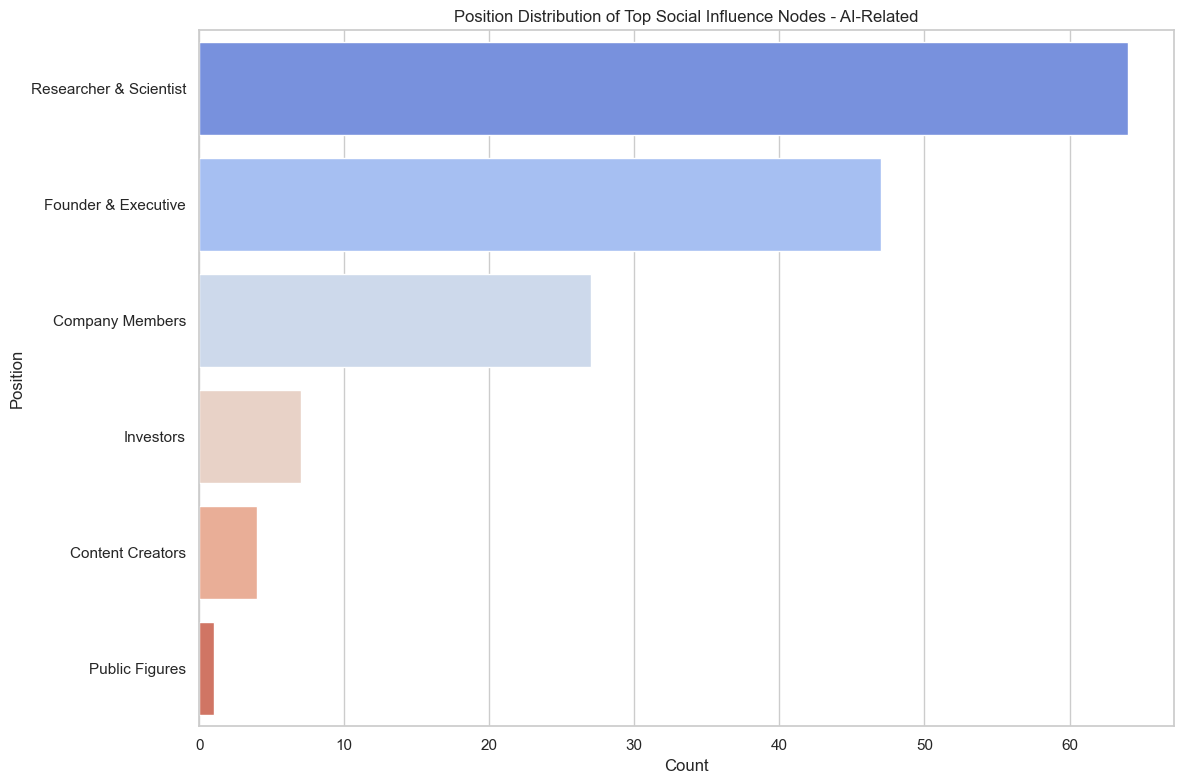

In [37]:
position_cat3 = top_influencers_person2['position_categorized'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat3.values, y=position_cat3.index, palette='coolwarm')
plt.title('Position Distribution of Top Social Influence Nodes - AI-Related')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution3')
plt.show()

Saving figure location_distribution3


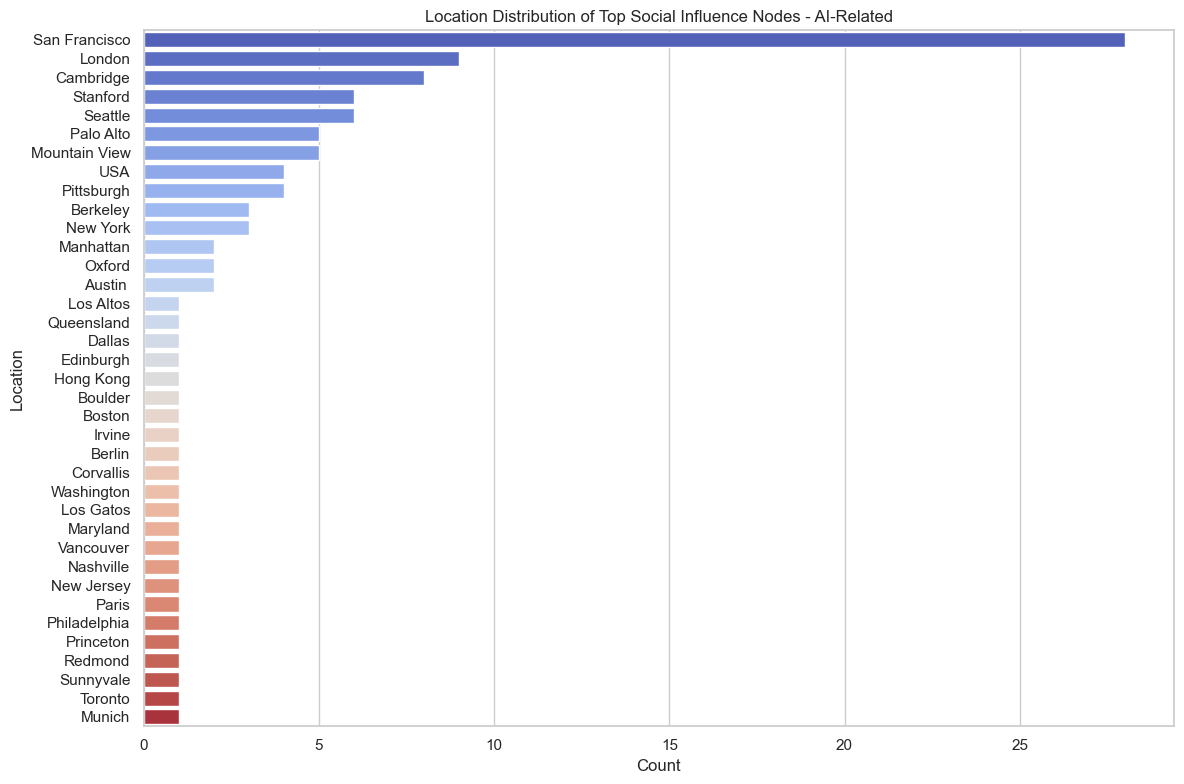

In [38]:
location_cat3 = top_influencers_person2['location_cleansed'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat3.values, y=location_cat3.index, palette='coolwarm')
plt.title('Location Distribution of Top Social Influence Nodes - AI-Related')
plt.xlabel('Count')
plt.ylabel('Location')
save_fig('location_distribution3')
plt.show()

### Social influence - scientist/research

In [39]:
G7 = nx.DiGraph()

for _, row in data_cleaned2.iterrows():
    if row['position_categorized'] == 'Researcher & Scientist':
        # G7.add_node(row['screenName_kol'], type='influencer')
        G7.add_node(row['name_fo'], type='following')
        G7.add_edge(row['name_kol'], row['name_fo'])
    
        G7.nodes[row['name_fo']]['followersCount'] = row['followersCount_fo']
        G7.nodes[row['name_fo']]['tweetsCount'] = row['tweetsCount_fo']
        G7.nodes[row['name_fo']]['friendsCount'] = row['friendsCount_fo']
        # G7.nodes[row['name_fo']]['certified'] = row['certified_kol']  # Verification status could also indicate influence


In [40]:
# Normalize metrics
max_followers = max(nx.get_node_attributes(G7, 'followersCount').values(), default=0)  # Adding default to handle empty cases
max_degree = max(nx.degree_centrality(G7).values(), default=0)  # Adding default to handle empty cases

for node in G7.nodes():
    followers_count = G7.nodes[node].get('followersCount', 0)  # Provide a default if missing
    followers_norm = followers_count / max_followers if max_followers > 0 else 0
    degree_norm = nx.degree_centrality(G7).get(node, 0) / max_degree if max_degree > 0 else 0
    G7.nodes[node]['influence_score'] = 0.5 * followers_norm + 0.5 * degree_norm

In [41]:
# Finding top influencers within KOL's followings
top_influencers3 = sorted(G7.nodes(data=True), key=lambda x: x[1].get('influence_score', 0), reverse=True)[:200]

top_influencers_in_followings3 = pd.DataFrame({
    'Node': [node for node, data in top_influencers3],
    'Influence Score': [data['influence_score'] for node, data in top_influencers3],
    'Followers Count': [data.get('followersCount', 'N/A') for node, data in top_influencers3]
})

# Exclude KOL
top_influencers_in_followings3 = top_influencers_in_followings3[~top_influencers_in_followings3['Node'].isin(KOL_list)].reset_index(drop = True)
# top_influencers_in_followings3

In [42]:
top_influencers_full3 = data_cleaned[data_cleaned['name_fo'].isin(top_influencers_in_followings3['Node'])].drop_duplicates('name_fo').reset_index(drop = True)
# top_influencers_full3

In [43]:
top_influencers_person3 = top_influencers_full3[top_influencers_full3['if personal account'] == 'Y']
top_influencers_person3

profileUrl    screenName_fo     userId_fo  \
0           https://twitter.com/giffmana         giffmana  2.236048e+09   
1       https://twitter.com/EricLander46     EricLander46  1.386753e+18   
2          https://twitter.com/haldaume3        haldaume3  1.581065e+08   
3      https://twitter.com/KofmanMichael    KofmanMichael  1.262846e+18   
4      https://twitter.com/BretWeinstein    BretWeinstein  7.868345e+07   
..                                   ...              ...           ...   
182  https://twitter.com/arankomatsuzaki  arankomatsuzaki  7.944334e+17   
183          https://twitter.com/minchoi          minchoi  2.311399e+07   
184      https://twitter.com/timnitGebru      timnitGebru  3.598312e+08   
185     https://twitter.com/mmitchell_ai     mmitchell_ai  7.485286e+17   
186        https://twitter.com/TheFigen_        TheFigen_  1.562039e+18   

                                            name_fo  \
0                                Lucas Beyer (bl16)   
1                                       Eric Lander   
2                                      Hal Daum III   
3                                    Michael Kofman   
4                                    Bret Weinstein   
..                                              ...   
182                                Aran Komatsuzaki   
183                                        Min Choi   
184  @timnitGebru@dair-community.social on Mastodon   
185                                       MMitchell   
186                                           Figen   

                                             imgUrl_fo  \
0    https://pbs.twimg.com/profile_images/378800000...   
1    https://pbs.twimg.com/profile_images/139543125...   
2    https://pbs.twimg.com/profile_images/127373598...   
3    https://pbs.twimg.com/profile_images/172479009...   
4    https://pbs.twimg.com/profile_images/171927006...   
..                                                 ...   
182  https://pbs.twimg.com/profile_images/156122098...   
183  https://pbs.twimg.com/profile_images/163835911...   
184  https://pbs.twimg.com/profile_images/166044380...   
185  https://pbs.twimg.com/profile_images/759051761...   
186  https://pbs.twimg.com/profile_images/164588081...   

                                                bio_fo  \
0    Researcher (Google DeepMind/Brain in Zrich, ex...   
1    Science Advisor to the President and Director ...   
2    Human-centered AI #HCAI, NLP & ML. Director @t...   
3    Senior Fellow, Carnegie Endowment. Defense ana...   
4    DarkHorse. Prof in Exile. Trade-Offs. Telomere...   
..                                                 ...   
182                                        @TeraflopAI   
183  AI Educator.  about AI, solutions and interest...   
184  she/her\nI am at @timnitGebru@dair-community.s...   
185  Interdisciplinary researcher focused on shapin...   
186  PhD musicology/Teacher/Turkish woman/ Posting ...   

                                  website_fo               location  \
0                             lucasb.eyer.be        Z√ºrich, Suisse   
1                             whitehouse.gov         Washington, DC   
2                                        NaN  Washington, D.C., USA   
3         carnegieendowment.org/experts/2362  Washington, D.C. area   
4                     rumble.com/c/darkhorse  Washington State, USA   
..                                       ...                    ...   
182  arankomatsuzaki.wordpress.com/about-me/                    NaN   
183                                      NaN                    NaN   
184                       dair-institute.org                    NaN   
185                           m-mitchell.com                    NaN   
186                  instagram.com/thefigen/                    NaN   

    location_cleansed                    createdAt_fo  ...         name_kol  \
0              Suisse  Sun Dec 08 13:31:09 +0000 2013  ...       Yann LeCun   
1          Washington  Mon Apr 26 18:42:49 +0000 2021  ...     

Saving figure org_distribution1


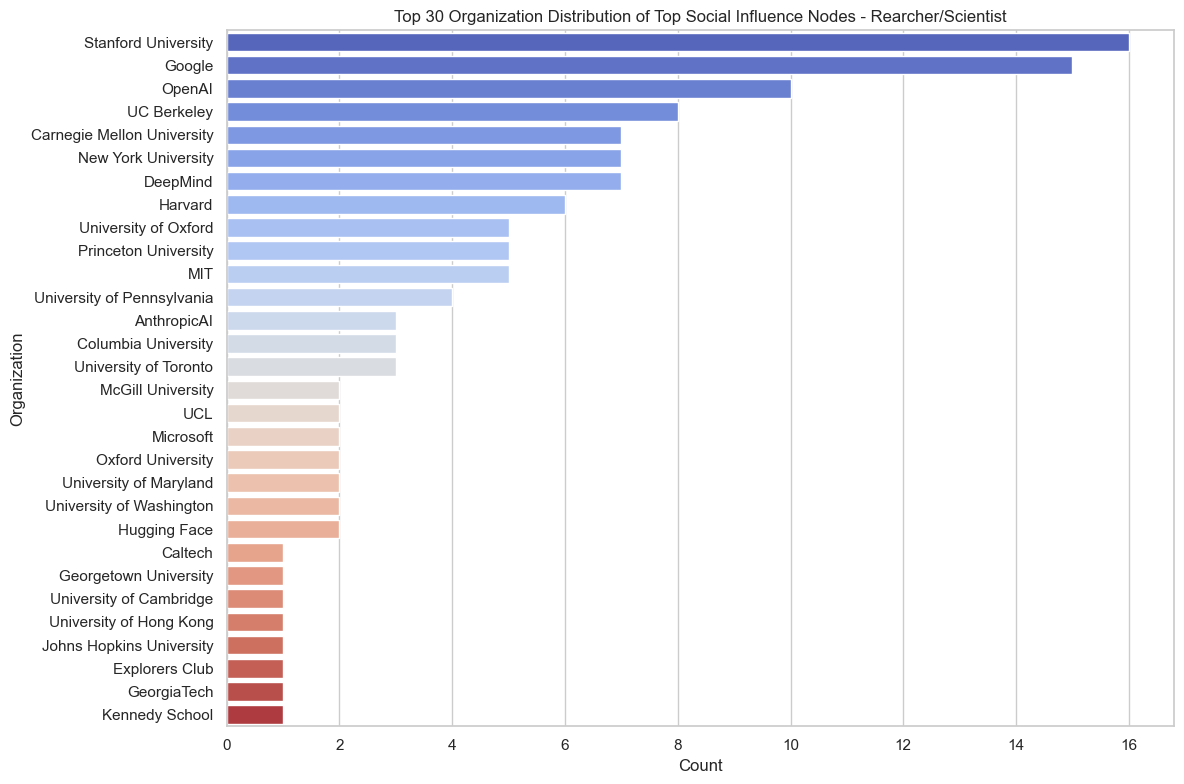

In [46]:
org_cat = top_influencers_person3['highest_level_org'].value_counts().head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=org_cat.values, y=org_cat.index, palette='coolwarm')
plt.title('Top 30 Organization Distribution of Top Social Influence Nodes - Rearcher/Scientist')
plt.xlabel('Count')
plt.ylabel('Organization')
save_fig('org_distribution1')
plt.show()

Saving figure location_distribution4


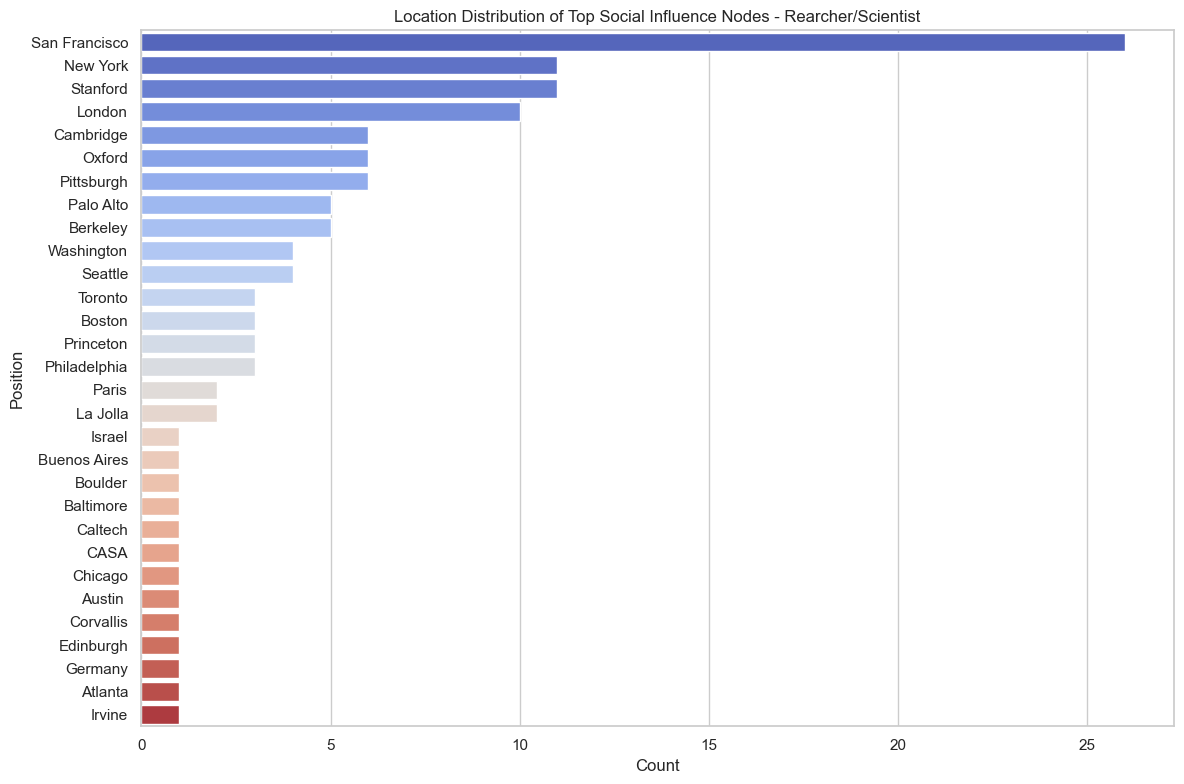

In [47]:
location_cat4 = top_influencers_person3['location_cleansed'].value_counts().head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat4.values, y=location_cat4.index, palette='coolwarm')
plt.title('Location Distribution of Top Social Influence Nodes - Rearcher/Scientist')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('location_distribution4')
plt.show()

### Hidden Gem

In [48]:
data_cleaned['followersCount_fo'].describe()

count    3.641000e+03
mean     2.889949e+06
std      1.372349e+07
min      3.080000e+02
25%      2.072000e+04
50%      9.230600e+04
75%      8.452140e+05
max      1.802535e+08
Name: followersCount_fo, dtype: float64

In [49]:
# Compute how many KOLs follow each person
followed_by = {fo: len(set(G2.predecessors(fo))) for fo in set(data_cleaned['name_fo'])}

# Merge this data back into the original DataFrame
kol_following_count = data_cleaned[['name_fo', 'followersCount_fo', 'if personal account', 'ai_related']].drop_duplicates().copy()
kol_following_count['followed_by_kols'] = kol_following_count['name_fo'].map(followed_by)

# Filter to find users followed by many KOLs but with fewer followers or friends
threshold_followers = 5000  # threshold for followers
threshold_kols = 2         # minimum number of KOLs following

selected_people = kol_following_count[(kol_following_count['followed_by_kols'] >= threshold_kols) &
                        (kol_following_count['followersCount_fo'] < threshold_followers)]


In [50]:
selected_people

name_fo  followersCount_fo if personal account ai_related  \
96      Miriam Vogel              947.0                   Y          Y   
149   Jong Wook Kim              3535.0                   Y          Y   
183   Jong Wook Kim              3533.0                   Y          Y   
194      Open Review             3731.0                   Y          N   
218     Rafael Mller             1242.0                   Y          Y   
...              ...                ...                 ...        ...   
3289     Sara Sabour             1247.0                   Y          Y   
3300    Google Brain             4512.0                   N          Y   
3322  Henrique Ponde             1356.0                   Y          Y   
3325     Brooke Chan             2076.0                   Y          Y   
3465   Mehran Sahami             2126.0                   Y          N   

      followed_by_kols  
96                   2  
149                  2  
183                  2  
194                  2  
218                  2  
...                ...  
3289                 2  
3300                 2  
3322                 2  
3325                 2  
3465                 2  

[109 rows x 5 columns]

In [51]:
selected_people = selected_people[(selected_people['if personal account'] == 'Y') & (selected_people['ai_related'] == 'Y')].drop_duplicates(subset='name_fo')
selected_people

name_fo  followersCount_fo if personal account ai_related  \
96      Miriam Vogel              947.0                   Y          Y   
149   Jong Wook Kim              3535.0                   Y          Y   
218     Rafael Mller             1242.0                   Y          Y   
280      Yoav Shoham             2066.0                   Y          Y   
391     Sanmi Koyejo             1547.0                   Y          Y   
...              ...                ...                 ...        ...   
3002      alewkowycz             2606.0                   Y          Y   
3048      Peter Chen             2612.0                   Y          Y   
3055    Melody Guan              3320.0                   Y          Y   
3112     Greg Diamos             2869.0                   Y          Y   
3289     Sara Sabour             1247.0                   Y          Y   

      followed_by_kols  
96                   2  
149                  2  
218                  2  
280                  2  
391                  2  
...                ...  
3002                 2  
3048                 2  
3055                 3  
3112                 3  
3289                 2  

[63 rows x 5 columns]

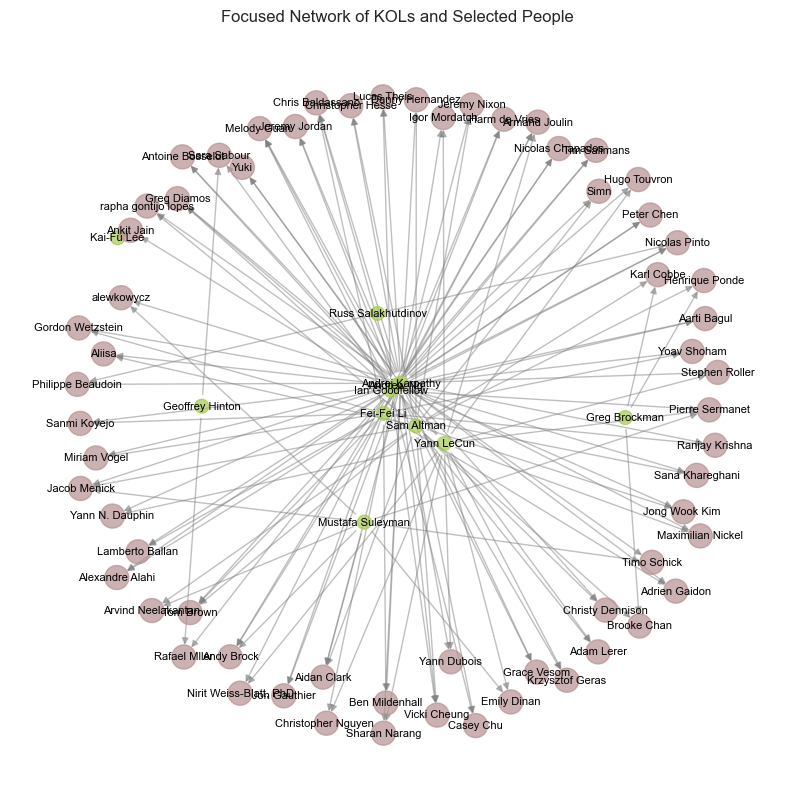

In [52]:
# Initialize a new directed graph
H = nx.DiGraph()

# Add only relevant nodes and edges
for _, row in data_cleaned.iterrows():
    if row['name_fo'] in selected_people['name_fo'].values:
        H.add_edge(row['name_kol'], row['name_fo'])

# Define node colors and sizes based on their role
node_colors = ['#b69190' if node in selected_people['name_fo'].values else '#a6ca50' for node in H.nodes()]
node_sizes = [300 if node in selected_people['name_fo'].values else 100 for node in H.nodes()]

# Visualize the network
plt.figure(figsize=(10, 10))  # Set the figure size
pos = nx.spring_layout(H)  # Node positions

nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(H, pos, edge_color='gray', width=1.0, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=8, font_color='black')

plt.title('Focused Network of KOLs and Selected People')
plt.axis('off')  # Hide the axes
plt.show()

In [53]:
selected_people_info = data_cleaned[data_cleaned['name_fo'].isin(selected_people['name_fo'])].drop_duplicates(subset='name_fo').reset_index(drop=True)
selected_people_info

profileUrl  screenName_fo     userId_fo  \
0     https://twitter.com/VogelMiriam    VogelMiriam  1.195854e+09   
1   https://twitter.com/_jongwook_kim  _jongwook_kim  2.260537e+08   
2   https://twitter.com/rafaelrmuller  rafaelrmuller  2.264369e+09   
3         https://twitter.com/yshoham        yshoham  2.732143e+07   
4     https://twitter.com/sanmikoyejo    sanmikoyejo  2.790739e+09   
..                                ...            ...           ...   
58     https://twitter.com/alewkowycz     alewkowycz  1.354198e+18   
59    https://twitter.com/peterxichen    peterxichen  9.458098e+17   
60     https://twitter.com/MelodyGuan     MelodyGuan  2.864542e+08   
61  https://twitter.com/GregoryDiamos  GregoryDiamos  1.378254e+09   
62    https://twitter.com/sabour_sara    sabour_sara  9.356069e+17   

           name_fo                                          imgUrl_fo  \
0     Miriam Vogel  https://pbs.twimg.com/profile_images/130487448...   
1   Jong Wook Kim   https://pbs.twimg.com/profile_images/114916967...   
2     Rafael Mller  https://pbs.twimg.com/profile_images/114860373...   
3      Yoav Shoham  https://pbs.twimg.com/profile_images/495807736...   
4     Sanmi Koyejo  https://pbs.twimg.com/profile_images/172155868...   
..             ...                                                ...   
58      alewkowycz  https://pbs.twimg.com/profile_images/154276403...   
59      Peter Chen  https://pbs.twimg.com/profile_images/176599067...   
60    Melody Guan   https://pbs.twimg.com/profile_images/172282980...   
61     Greg Diamos  https://pbs.twimg.com/profile_images/714944856...   
62     Sara Sabour  https://abs.twimg.com/sticky/default_profile_i...   

                                               bio_fo  \
0   President @ai_equal, former @theJusticeDepartm...   
1   Member of Technical Staff @OpenAI, authored CL...   
2                                                 NaN   
3   AI21 Labs, co-founder; Stanford University, Pr...   
4                  I lead @stai_research at Stanford.   
..                                                ...   
58  Member of Technical Staff at @inflectionAI. Fo...   
59  Covariant CEO and Co-Founder. Previously @Open...   
60                                                NaN   
61                 Lamini | I build AI supercomputers   
62                                                NaN   

                    website_fo          location location_cleansed  \
0                  equalai.org  Washington D.C.         Washington   
1                 jongwook.kim     United States               USA   
2                          NaN  Toronto, Ontario           Toronto   
3      cs.stanford.edu/~shoham  Tel Aviv, Israel          Tel Aviv   
4                          NaN      Stanford, CA          Stanford   
..                         ...               ...               ...   
58                         NaN               NaN               NaN   
59                         NaN               NaN               NaN   
60  linkedin.com/in/melodyguan               NaN               NaN   
61                   lamini.ai               NaN               NaN   
62                         NaN               NaN               NaN   

                      createdAt_fo  ...          name_kol  \
0   Tue Feb 19 04:26:56 +0000 2013  ...        Fei-Fei Li   
1   Mon Dec 13 05:32:26 +0000 2010  ...        Sam Altman   
2   Sun Jan 05 22:54:07 +0000 2014  ...    Ian Goodfellow   
3   Sat Mar 28 22:18:36 +0000 2009  ...        Fei-Fei Li   
4   Thu Sep 04 22:44:16 +0000 2014  ...        Fei-Fei Li   
..                             ...  ...               ...   
58  Tue Jan 26 22:42:59 +0000 2021  ...  Mustafa Suleyman   
59  Wed Dec 27 00:13:31 +0000 2017  ...   Andrej Karpathy   
60  Sat Apr 23 01:35:17 +0000 2011  ...   Andrej Karpathy   
61  Wed Apr 24 23:47:51 +0000 2013  ...   Andrej Karpathy   
62  Tue Nov 28 20:30:33 +0000 2017  ...    Ian Goodfellow   

                                           imgUrl_

Saving figure org_distribution2


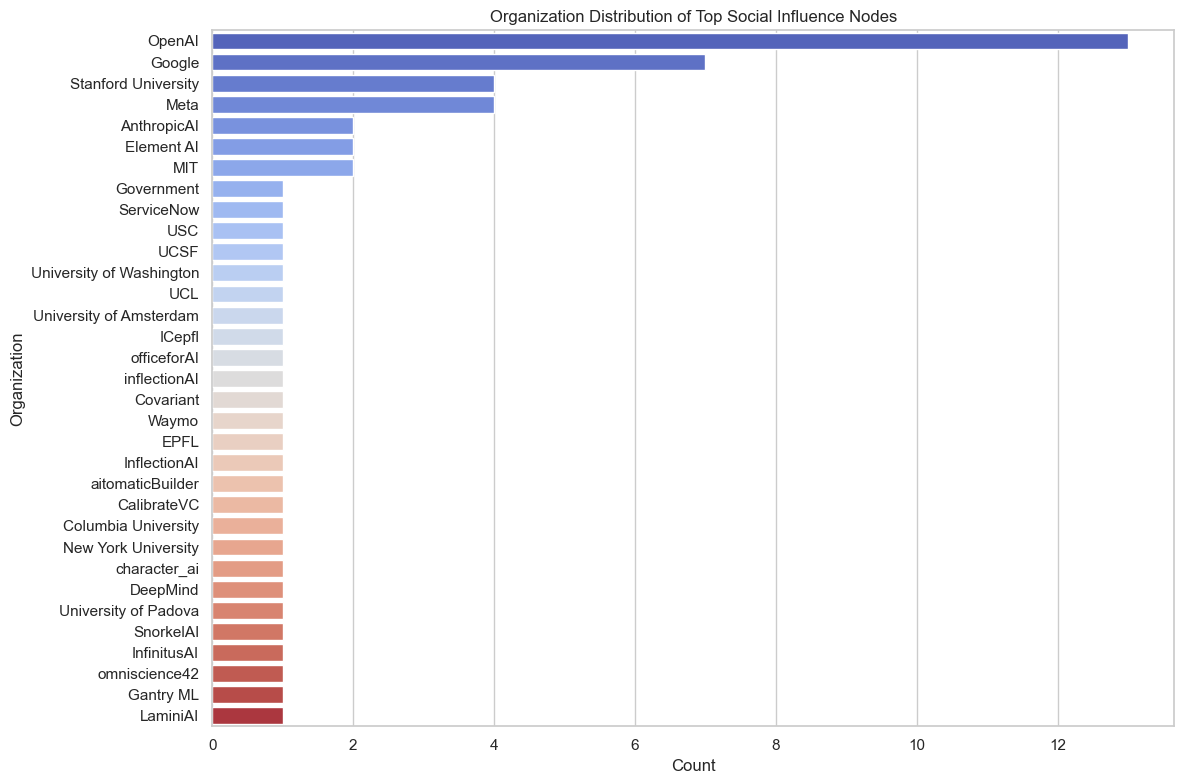

In [54]:
org_cat2 = selected_people_info['highest_level_org'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=org_cat2.values, y=org_cat2.index, palette='coolwarm')
plt.title('Organization Distribution of Top Social Influence Nodes')
plt.xlabel('Count')
plt.ylabel('Organization')
save_fig('org_distribution2')
plt.show()

### Homophily

In [55]:
founder_executive = data_cleaned2[data_cleaned2['position_categorized_kol'] == 'Founder & Executive']

# Create a directed graph
G8 = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in founder_executive.iterrows():
    if row['ai_related'] == 'Y':
        G8.add_node(row['name_fo'], type=row['position_categorized'])
        G8.add_node(row['name_kol'], type=row['position_categorized_kol'])
        G8.add_edge(row['name_kol'], row['name_fo'], follow_back=row['following_fo'])

In [56]:
def calculate_homophily(graph, attribute):
    # Count same attribute edges and total edges
    same_attr_edges = 0
    total_edges = 0
    
    for u, v in graph.edges():
        total_edges += 1
        if graph.nodes[u][attribute] == graph.nodes[v][attribute]:
            same_attr_edges += 1
    
    # Calculate homophily ratio
    homophily_ratio = same_attr_edges / total_edges if total_edges else 0
    return homophily_ratio


In [57]:
# Calculate homophily based on 'attribute'
homophily_ratio = calculate_homophily(G8, 'type')
print("Homophily Ratio:", homophily_ratio)

Homophily Ratio: 0.2776255707762557


In [58]:
research_scientist = data_cleaned2[data_cleaned2['position_categorized_kol'] == 'Researcher & Scientist']

# Create a directed graph
G9 = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in research_scientist.iterrows():
    if row['ai_related'] == 'Y':
        G9.add_node(row['name_fo'], type=row['position_categorized'])
        G9.add_node(row['name_kol'], type=row['position_categorized_kol'])
        G9.add_edge(row['name_kol'], row['name_fo'], follow_back=row['following_fo'])


In [59]:
# Calculate homophily based on 'attribute'
homophily_ratio2 = calculate_homophily(G9, 'type')
print("Homophily Ratio:", homophily_ratio2)

Homophily Ratio: 0.466903073286052
